<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8); text-align: center;">
    <h1>Оптимизация расходов ООО «Так закаляем сталь»</h1>
</div>


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>План работы:</h2>
    <ol>
        <li><b>Первичный обзор данных:</b> изучение основных характеристик датасета, определение типов данных и проверка на наличие пропусков или аномалий.</li>
        <li><b>Предобработка данных:</b> подготовка данных для дальнейшего анализа и моделирования.</li>
            <ul><li><b>Удаление пропусков:</b> очистка данных от пропущенных или неполных значений, которые могут негативно повлиять на качество модели.</li>
                <li><b>Выведение новых фичей:</b> создание новых переменных на основе существующих данных для улучшения прогностической способности модели.</li>
            </ul>
        <li><b>Подбор гиперпараметров и фичей для моделей:</b> определение оптимальных параметров и выбор наиболее значимых переменных для построения модели.</li>
        <li><b>Выбор лучшей модели:</b> оценка и сравнение различных моделей на основе метрики MAE для выбора наиболее эффективной.</li>
        <li><b>Проверка на тестовой выборке:</b> оценка итоговой модели на отложенных данных для проверки ее способности к обобщению.</li>
    </ol>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>Введение:</h2>
    <p>В рамках данной работы нам представлен набор данных, содержащий информацию о процессе обработки стали в компании ООО «Так закаляем сталь». Данные включают всю информацию о процессе обработки стали, начиная от этапа смешивания до финальных замеров. Заказчик стремится оптимизировать производственные расходы, а именно уменьшить потребление электроэнергии на этапе обработки стали.</p>
    <p>Снижение потребления электроэнергии станет возможным, если мы сможем точно предсказать температуру раствора. Так, если мы предсказываем, что температура стали поднимется выше оптимальной, мы можем заранее уменьшить использование электроэнергии, сэкономив таким образом на затратах. С другой стороны, если мы предсказываем, что температура упадет ниже необходимого уровня, мы можем заранее увеличить энергию для поддержания правильного нагрева, чтобы предотвратить дефекты продукции и избыточные затраты на переработку.</p>
    <p>В данной работе мы будем использовать метрику MAE, поскольку она легко интерпретируется: если MAE равна 1.0, это означает, что в среднем наши прогнозы отличаются от истинных значений на одну единицу температуры. Кроме того, в отличие от других метрик, MAE не увеличивает вес для больших ошибок, т.е. все ошибки, независимо от их размера, учитываются одинаково. Еще одним преимуществом MAE является ее устойчивость к выбросам по сравнению с MSE. В данных о температуре могут быть выбросы или аномалии, которые могут сильно искажать MSE, в то время как MAE будет менее чувствителен к этим аномалиям.</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>Цель:</h2>
    <p>Снизить потребление электроэнергии по средствам более четкого подбора параметров. Данная задача будет реализована через прагнозирование температуры на основе параметров. Прогнозирование температуру - это задача регрессии.</p>
</div>

 <div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8); text-align: center;">
    <h2>1. Первичный обзор данных</h2>
</div>


In [2]:
#pip install flake8 pycodestyle_magic

In [3]:
#%load_ext pycodestyle_magic

In [4]:
#%flake8_off

In [5]:
#!pip install catboost

In [6]:
#!pip install xgboost

In [2]:
#бтблиотеки для работы с данными
import pandas as pd 
import numpy as np 
#бтблиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
#для работы модели
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#модели
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
#переменные и параметры
RANDOM_STATE = 220523
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [3]:
try:
    #данные об электродах
    data_arc = pd.read_csv('/Users/zond/Desktop/final_project/data_arc.csv')
    #данные о подаче сыпучих материалов
    data_bulk = pd.read_csv('/Users/zond/Desktop/final_project/data_bulk.csv') 
    #данные о подаче сыпучих материалов (время)
    data_bulk_time = pd.read_csv('/Users/zond/Desktop/final_project/data_bulk_time.csv')
    #данные о продувке сплава газом
    data_gas = pd.read_csv('/Users/zond/Desktop/final_project/data_gas.csv') 
    #результаты измерения температуры
    data_temp = pd.read_csv('/Users/zond/Desktop/final_project/data_temp.csv')
    #данные о проволочных материалах (объём)
    data_wire = pd.read_csv('/Users/zond/Desktop/final_project/data_wire.csv')
    #данные о проволочных материалах (время)
    data_wire_time = pd.read_csv('/Users/zond/Desktop/final_project/data_wire_time.csv') 
except:
    #данные об электродах
    data_arc = pd.read_csv('/datasets/data_arc_new.csv')
    #данные о подаче сыпучих материалов
    data_bulk = pd.read_csv('/datasets/data_bulk_new.csv') 
    #данные о подаче сыпучих материалов (время)
    data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
    #данные о продувке сплава газом
    data_gas = pd.read_csv('/datasets/data_gas_new.csv') 
    #результаты измерения температуры
    data_temp = pd.read_csv('/datasets/data_temp_new.csv')
    #данные о проволочных материалах (объём)
    data_wire = pd.read_csv('/datasets/data_wire_new.csv')
    #данные о проволочных материалах (время)
    data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')

In [4]:
def display_info(isFrame, **data):
    """
    
    Функция выводит на экран перве пять строк датафрейма, подписывая каждый
    Принимает на вход данные в следующем формате: желаемое_название_таблицы = {'доп_информация':название_датасета}
    *** Если доп информации нет, то передавайте ''
    
    """
    
    # используем функцию display,если передается фрейм и print, если передаются отсальные типы
    if isFrame:
        func = display 
    else:
        func = print
    # в цикле разберем переданные параметры 
    for data_name, data_inf in data.items():
    #обернем название в сетку, равную его длине 
        data_print = '|| ' + data_name.upper() + ' ||'
        print('='*len(data_print))
        print(data_print)
        print('='*len(data_print))
        print()
        
        #выводим фрейм
        for inf, frame in data_inf.items():
        #если доп информации нет, то выводим только фрейм 
            if not inf:
                func(frame)
        
            else:
                func(inf, frame)
            print()

    

In [5]:
display_info(True, data_arc = {'Данные об электродах':data_arc.head()},
            data_bulk = {'Данные о подаче сыпучих материалов':data_bulk.head()},
            data_bulk_time = {'Данные о подаче сыпучих материалов (время)':data_bulk_time.head()},
            data_gas = {'Данные о продувке сплава газом':data_gas.head()},
            data_temp = {'Результаты измерения температуры':data_temp.head()},
            data_wire = {'Данные о проволочных материалах (объём)':data_wire.head()},
            data_wire_time = {'Данные о проволочных материалах (время)':data_wire_time.head()})

|| DATA_ARC ||



'Данные об электродах'

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397



|| DATA_BULK ||



'Данные о подаче сыпучих материалов'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



|| DATA_BULK_TIME ||



'Данные о подаче сыпучих материалов (время)'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56



|| DATA_GAS ||



'Данные о продувке сплава газом'

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



|| DATA_TEMP ||



'Результаты измерения температуры'

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



|| DATA_WIRE ||



'Данные о проволочных материалах (объём)'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



|| DATA_WIRE_TIME ||



'Данные о проволочных материалах (время)'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Возможно имеет значение сколько по времени нагревают раствор, надо найти разницу столбцов Начало нагрева дугой и Конец нагрева дугой. Можно достать косинус фи, можно достать полную мощность 

In [6]:
def info(name, data):
    print('='*55)
    print(' '*20,name.upper())
    print('='*55)
    print(data.info())
    print('='*55)


In [7]:
info('data_arc', data_arc)
info('data_bulk', data_bulk)
info('data_bulk_time', data_bulk_time)
info('data_gas', data_gas)
info('data_temp', data_temp)
info('data_wire', data_wire)
info('data_wire_time', data_wire_time)

                     DATA_ARC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None
                     DATA_BULK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     fl

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h3>Итоги обзора:</h3>
    <p>После первичного осмотра данных в наборе об электродах, видно, что для каждого ключа присутствует несколько записей, которые в будущем нужно будет объединить. А также видно, что в данных нет пропусков.</p>
    <p>В данных, о подаче сыпучих материалов, видно, что очень много пропусков, которые нужно будет заменить на ноль - такие условия от заказчика. Ещё тут присутствуют столбецы, которые содержат очень мало данных, от них в будущем нужно будет избавиться, потому что они не информативны. В данных о подаче запущенных материалов, которые содержат время, также много пропусков, которые можно будет заполнить нулями, но сам по себе этот набор данных не несёт полезную информацию, поэтому работы с ним не будем. В данных о продувке сплава газом ситуация отличная - пропусков нет.</p>
    <p>А вот набор данных, который содержит информацию о измерении температуры, и есть наш целевой признак. Также видно, что в этом наборе данных для одного ключа присутствует несколько записей, их нужно будет объединить. А также в этом наборе присутствуют пропуски, но нам нужны только первый и последний замеры, поэтому уже после будем смотреть на пропуски. Также нужно будет отбросить все температуры ниже 1500°.</p>
    <pВ> данных о проволочных материалах, объему и времени, точно такая же ситуация, как и в данных о сыпучих материалах: заполним все пропуски нулями, таблицу со временем не будем использовать.</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8); text-align: center;">
    <h2>2. Предобработка данных</h2>
</div>




<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>В данном разделе мы будем заниматься предобработкой данных. Целью данного раздела стоит удаление пропусков, удаление некорректных значений, объединение нескольких записей для одного ключа в одну запись, а также выведение новых признаков, которые помогут модели обучаться эффективнее.</p>
    <p>А начнём мы с обработки целевого признака.</p>
</div>

In [8]:
# функция собирает первую и последнюю температуру 
start_temp = []
fin_temp = []
for k in range(1, data_temp['key'].iloc[-1] + 1):
    try:
        data = data_temp.loc[data_temp['key'] == k]
        start_temp.append(data.head(1)['Температура'].iloc[0])
        fin_temp.append(data.tail(1)['Температура'].iloc[-1])
    except:
        start_temp.append(np.nan)
        fin_temp.append(np.nan)

In [9]:
d = {'key': list(range(1, data_temp['key'].iloc[-1] + 1)), 'start_temp': start_temp, 'fin_temp':fin_temp}
new_temp = pd.DataFrame(data=d)
new_temp.shape

(3241, 3)

In [10]:
if new_temp['key'].iloc[-1] == data_temp['key'].iloc[-1]:
    print('Последний ключ в новом дата фрейме совпадает с последним ключом из старого дата фрейма')
else:
    print('Error')

Последний ключ в новом дата фрейме совпадает с последним ключом из старого дата фрейма


In [11]:
pd.DataFrame(round(new_temp.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
key,0.000000
start_temp,1.000000
fin_temp,24.000000


In [12]:
new_temp = new_temp.dropna(subset = ['start_temp', 'fin_temp'])
new_temp.shape

(2477, 3)

In [13]:
i_drop = []
for i in range(len(new_temp)):
    if new_temp['start_temp'].iloc[i] < 1500 or new_temp['fin_temp'].iloc[i] < 1500:
        i_drop.append(i)
i_drop

[855, 1201, 1604, 2036]

In [14]:
new_temp = new_temp.loc[(new_temp['start_temp'] > 1500) & (new_temp['fin_temp'] > 1500)]
new_temp.shape

(2473, 3)


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Здесь мы делаем следующее: сначала создаем функцию, которая будет получать из набора данных первое и последнее значение температуры для каждого ключа. Дальше создаем новый набор, где хранятся корректные значения. Там есть такие столбцы, как ключ, стартовая температура и конечная температура. Дальше мы проверяем, совпадает ли последний ключ нового набора с последним ключом набора, представленного нам. Также мы проверили набор на наличие пропусков в начальной и конечной температуре, они были, поэтому мы их удалили. Ещё одним важным условием от заказчика было удаление температур, которые ниже 1500°. Мы намеренно не включаем промежуточную температуру в наш новый набор данных, потому что заказчик запретил это делать.</p>
</div>


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>После обработки целевого признака, можно заниматься следующими наборами данных.
Также огромное значение для нас имеют данные об электродах, потому что они содержат информацию о мощности и напрямую влияют на нагрев. Но, так как в данных для одного ключа содержится несколько записей, мы будем суммировать всю информацию по каждой записи. Здесь мы можем добавить новые столбцы: столбец, который называется 'difference', содержит в себе информацию о времени подачи энергии. Столбцы 'full power' и 'full power spent' содержат общую мощность, расчитанную по формуле Пифагора, и объем энергии, потраченный за время работы, соответственно. Также из данных были удалены ключи, которые не содержатся в целевом наборе данных, и ключи, которые содержат отрицательный показатель реактивной мощности, потому что заказчик указал на их удаление.</p>
</div>



In [15]:
keys = list(new_temp['key'])
data_arc = data_arc[data_arc['key'].isin(keys)]


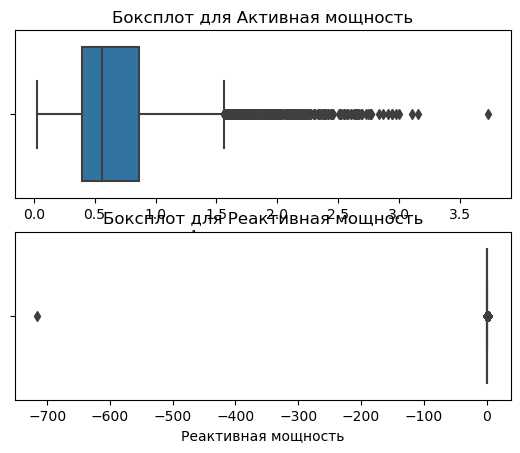

In [16]:


# Создаем новый фигуру и оси
fig, axs = plt.subplots(2)

# Создаем боксплот для 'Активная мощность'
sns.boxplot(data=data_arc, x='Активная мощность', ax=axs[0])

# Создаем боксплот для 'Реактивная мощность'
sns.boxplot(data=data_arc, x='Реактивная мощность', ax=axs[1])

axs[0].set_title('Боксплот для Активная мощность')
axs[1].set_title('Боксплот для Реактивная мощность')
# Показываем графики
plt.show()

In [17]:
data_arc['Активная мощность'].describe()

count    11432.000000
mean         0.676338
std          0.408619
min          0.030002
25%          0.398404
50%          0.561938
75%          0.864507
max          3.731596
Name: Активная мощность, dtype: float64

In [18]:
data_arc = data_arc.loc[data_arc['Реактивная мощность'] > 0]

In [19]:

if len(data_arc[data_arc.isna().any(axis=1)]) == 0:
    print('Пропусков нет')
else:
    print(len(data_arc[data_arc.isna().any(axis=1)]), 'пропусков')

Пропусков нет


In [20]:
data_arc["Начало нагрева дугой"] = pd.to_datetime(data_arc["Начало нагрева дугой"])
data_arc["Конец нагрева дугой"] = pd.to_datetime(data_arc["Конец нагрева дугой"])


In [21]:
keys = list(data_arc['key'])

In [22]:
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [23]:
#посчитаем время нагрева в секундах 
data_arc['difference'] = (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).apply(lambda x: x.total_seconds())


In [24]:
new_arc = data_arc.groupby('key')[['Активная мощность', 'Реактивная мощность', 'difference']].sum()


In [25]:
new_arc['full_power'] = np.sqrt(new_arc['Активная мощность']**2 + new_arc['Реактивная мощность']**2)

Тут по формуле был расчитан полный объем мощности $A = sqrt(B^2 + C^2)$, где B и C это рекативная и активная мощности

In [26]:
new_arc['full_power_spent'] = new_arc['full_power'] * new_arc['difference']

In [27]:
new_arc.head()

,Активная мощность,Реактивная мощность,difference,full_power,full_power_spent
key,,,,,
1,4.878147,3.183241,1098.0,5.824889,6395.728622
2,3.052598,1.998112,811.0,3.648398,2958.850582
3,2.525882,1.599076,655.0,2.989502,1958.124109
4,3.209250,2.060298,741.0,3.813674,2825.932742
5,3.347173,2.252643,869.0,4.034596,3506.063873



<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Теперь разберемся с данными о подаче сыпучих материалов. Начнем с того, что заполним все NaN нулями. После удалим все столбцы, в которых значений, отличающихся от нуля, меньше 100, такая ситуация говорит о том, что данный материал добавляли слишком редко, а это может плохо отразиться на обучении модели, потому что он будет занимать память, но не будет нести достаточную информативность. А также, если в тренировочной выборке окажутся только нулевые значения, а в тестовом, наоборот, много отличных от нуля, то это тоже приведет к ошибкам.
</p>
</div>

In [28]:
def fill_na_with_zeros(dataframe):
    filled_dataframe = dataframe.fillna(0)
    return filled_dataframe

In [29]:
data_bulk_new = fill_na_with_zeros(data_bulk)

In [30]:

def drop_columns_less_than_threshold(dataframe, threshold=100):
    columns_to_drop = []
    for column in dataframe.columns:
        non_zero_count = (dataframe[column] != 0).sum()  # считаем количество строк с 0
        if non_zero_count < threshold:
            columns_to_drop.append(column)  # добавляем колонку для удаления
    dataframe = dataframe.drop(columns_to_drop, axis=1)  # удаляем колонки 
    return dataframe

In [31]:
data_bulk_new = drop_columns_less_than_threshold(data_bulk_new)

In [32]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   3129 non-null   float64
 2   Bulk 3   3129 non-null   float64
 3   Bulk 4   3129 non-null   float64
 4   Bulk 6   3129 non-null   float64
 5   Bulk 10  3129 non-null   float64
 6   Bulk 11  3129 non-null   float64
 7   Bulk 12  3129 non-null   float64
 8   Bulk 14  3129 non-null   float64
 9   Bulk 15  3129 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 244.6 KB


In [33]:
data_bulk_new['full_bulk'] = data_bulk_new.loc[:,
                                               (data_bulk_new.columns != 'key')].apply(lambda x: 
                                                                                               x.sum(),
                                                                                               axis=1)

In [34]:
data_bulk_new['count_bulk'] = data_bulk_new.loc[:,
                                                (data_bulk_new.columns != 'key') 
                                                & (data_bulk_new.columns != 'full_bulk')].apply(lambda x:
                                                                                                (x != 0).sum(),
                                                                                                axis=1)


In [35]:
data_bulk_new.head()

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,full_bulk,count_bulk
0,1,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,553.0,4
1,2,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,582.0,4
2,3,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,544.0,4
3,4,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,595.0,4
4,5,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,584.0,4


In [36]:
data_bulk_new = data_bulk_new[data_bulk_new['key'].isin(keys)]


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Были удалены столбцы под номерами 2, 5, 7, 8, 9, 13, потому что в них слишком мало значений, отличных от нуля. Также в наборе данных о сыпучих материалах мы добавили два новых столбца: 'full bulk', который содержит данные о полном объеме затраченных материалов, и 'count bulk', который содержит количество добавленных материалов для каждого ключа. И удаляем строки, которые не входят в другие наборы данных.
</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Теперь разберемся с данными о проволочных материалах. Начнем с того, что заполним все NaN нулями. После удалим все столбцы, в которых значений, отличающихся от нуля, меньше 100, такая ситуация говорит о том, что данный материал добавляли слишком редко, а это может плохо отразиться на обучении модели, потому что он будет занимать память, но не будет нести достаточную информативность. А также, если в тренировочной выборке окажутся только нулевые значения, а в тестовом, наоборот, много отличных от нуля, то это тоже приведет к ошибкам.
</p>
</div>

In [37]:
data_wire_new = fill_na_with_zeros(data_wire)

In [38]:
data_wire_new = drop_columns_less_than_threshold(data_wire_new)

In [39]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3081 non-null   float64
 2   Wire 2  3081 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 72.3 KB


далее создадим два новых столбца, в которые добавим объем и количество материалов

In [40]:
data_wire_new['full_wire'] = data_wire_new.loc[:,
                                               (data_wire_new.columns != 'key')].apply(lambda x: 
                                                                                               x.sum(),
                                                                                               axis=1)

In [41]:
data_wire_new['count_wire'] = data_wire_new.loc[:,
                                                (data_wire_new.columns != 'key') 
                                                & (data_wire_new.columns != 'full_wire')].apply(lambda x:
                                                                                                (x != 0).sum(),
                                                                                                axis=1)


In [42]:
data_wire_new.head()

,key,Wire 1,Wire 2,full_wire,count_wire
0,1,60.059998,0.00000,60.059998,1
1,2,96.052315,0.00000,96.052315,1
2,3,91.160157,0.00000,91.160157,1
3,4,89.063515,0.00000,89.063515,1
4,5,89.238236,9.11456,98.352796,2



<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Были удалены столбцы под номерами 3, 4, 5, 6, 7, 8, 9, потому что в них слишком мало значений, отличных от нуля. Также в наборе данных о сыпучих материалах мы добавили два новых столбца: 'full_wire', который содержит данные о полном объеме затраченных материалов, и 'count_wire', который содержит количество добавленных материалов для каждого ключа. 
</p>
</div>


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Теперь разберем данные о продувке сплава газом, здесь значения не повторяются, проверим это через tail. Также достаточно сложно что-то добавить к этим данным, поэтому просто удалим не входящие в наш набор ключи и проверим пропуски. 

</p>
</div>

In [43]:
data_gas.tail()

,key,Газ 1
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959


In [44]:
pd.DataFrame(round(data_gas.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
key,0.000000
Газ 1,0.000000



<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>В нашем наборе отсутсвуют 4 ключа, но данные не повторяются, пропусков в данных нет. 

</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h3>Итоги предобработки</h3>
    <p> Обработка данных прошла успешно. Самое главное, что были удалены ключи, которые не содержат начальную или конечную температуру. Было добавлено достаточно много новых признаков, которые помогут модели обучиться лучше. Все данные были очищены от пропусков и некорректных значений, далее можно переходить к объединению и обучению на этих данных. </p>
</div>


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8); text-align: center;">
    <h2>3. Подбор гиперпараметров и фичей для моделей</h2>
</div>



<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>В этом разделе я планирую собрать полный набор данных для обучения, ещё раз оценить распределение признаков и корреляцию между ними, проверить ещё раз на наличие пропусков. Также здесь данные будут разделены на выборки: тестовую и тренировочную. И важным этапом будет оценка важности признаков, а уже после этой финальной подготовки будут подбираться гиперпараметры для моделей.
 

</p>
</div>


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8);">
    <h3>Обединиение и обзор датафрейма</h3>
</div>

In [45]:
def merge_datasets(df1, df2, df3, df4, df5):
    merged = df1.merge(df2, on='key', how='inner')
    merged = merged.merge(df3, on='key', how='inner')
    merged = merged.merge(df4, on='key', how='inner')
    merged = merged.merge(df5, on='key', how='inner')
    return merged

In [46]:
data = merge_datasets(new_temp, new_arc, data_bulk_new, data_wire_new, data_gas)

In [47]:
data.head()

,key,start_temp,fin_temp,Активная мощность,Реактивная мощность,difference,full_power,full_power_spent,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,full_bulk,count_bulk,Wire 1,Wire 2,full_wire,count_wire,Газ 1
0,1,1571.0,1613.0,4.878147,3.183241,1098.0,5.824889,6395.728622,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,553.0,4,60.059998,0.00000,60.059998,1,29.749986
1,2,1581.0,1602.0,3.052598,1.998112,811.0,3.648398,2958.850582,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,582.0,4,96.052315,0.00000,96.052315,1,12.555561
2,3,1596.0,1599.0,2.525882,1.599076,655.0,2.989502,1958.124109,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,544.0,4,91.160157,0.00000,91.160157,1,28.554793
3,4,1601.0,1625.0,3.209250,2.060298,741.0,3.813674,2825.932742,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,595.0,4,89.063515,0.00000,89.063515,1,18.841219
4,5,1576.0,1602.0,3.347173,2.252643,869.0,4.034596,3506.063873,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,584.0,4,89.238236,9.11456,98.352796,2,5.413692


In [48]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
key,0.000000
start_temp,0.000000
fin_temp,0.000000
Активная мощность,0.000000
Реактивная мощность,0.000000
difference,0.000000
full_power,0.000000
full_power_spent,0.000000
Bulk 1,0.000000
Bulk 3,0.000000


In [49]:
data[data.isnull().any(axis=1)]

,key,start_temp,fin_temp,Активная мощность,Реактивная мощность,difference,full_power,full_power_spent,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,full_bulk,count_bulk,Wire 1,Wire 2,full_wire,count_wire,Газ 1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  2325 non-null   int64  
 1   start_temp           2325 non-null   float64
 2   fin_temp             2325 non-null   float64
 3   Активная мощность    2325 non-null   float64
 4   Реактивная мощность  2325 non-null   float64
 5   difference           2325 non-null   float64
 6   full_power           2325 non-null   float64
 7   full_power_spent     2325 non-null   float64
 8   Bulk 1               2325 non-null   float64
 9   Bulk 3               2325 non-null   float64
 10  Bulk 4               2325 non-null   float64
 11  Bulk 6               2325 non-null   float64
 12  Bulk 10              2325 non-null   float64
 13  Bulk 11              2325 non-null   float64
 14  Bulk 12              2325 non-null   float64
 15  Bulk 14              2325 non-null   f

In [51]:
data.tail()

,key,start_temp,fin_temp,Активная мощность,Реактивная мощность,difference,full_power,full_power_spent,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,full_bulk,count_bulk,Wire 1,Wire 2,full_wire,count_wire,Газ 1
2320,2495,1570.0,1591.0,3.210690,2.360777,723.0,3.985197,2881.297646,0.0,21.0,0.0,0.0,90.0,0.0,256.0,129.0,223.0,719.0,5,89.150879,0.00000,89.150879,1,7.125735
2321,2496,1554.0,1591.0,4.203064,2.810185,940.0,5.055976,4752.617092,0.0,0.0,63.0,0.0,122.0,0.0,256.0,129.0,226.0,796.0,5,114.179527,0.00000,114.179527,1,9.412616
2322,2497,1571.0,1589.0,2.212379,1.851269,569.0,2.884756,1641.426283,0.0,0.0,85.0,0.0,0.0,0.0,230.0,124.0,226.0,665.0,4,94.086723,9.04800,103.134723,2,6.271699
2323,2498,1591.0,1594.0,3.408725,2.355428,750.0,4.143362,3107.521735,0.0,90.0,0.0,0.0,101.0,0.0,206.0,129.0,207.0,733.0,5,118.110717,0.00000,118.110717,1,14.953657
2324,2499,1569.0,1603.0,4.098431,2.777865,883.0,4.951128,4371.846122,0.0,47.0,0.0,0.0,0.0,0.0,233.0,126.0,227.0,633.0,4,110.160958,50.00528,160.166238,2,11.336151


In [52]:

def plot_features(df, columns):
    for column in columns:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # Построение гистограммы
        sns.histplot(df[column], kde=False, ax=axs[0], color='orange', bins=30)
        axs[0].set_title(f'Гистограмма {column}')

        # Построение boxplot
        sns.boxplot(x=df[column], color='red', ax=axs[1])
        axs[1].set_title(f'Boxplot {column}')

        plt.tight_layout()
        plt.show()


In [53]:
data.columns

Index(['key', 'start_temp', 'fin_temp', 'Активная мощность',
       'Реактивная мощность', 'difference', 'full_power', 'full_power_spent',
       'Bulk 1', 'Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 14', 'Bulk 15', 'full_bulk', 'count_bulk', 'Wire 1', 'Wire 2',
       'full_wire', 'count_wire', 'Газ 1'],
      dtype='object')

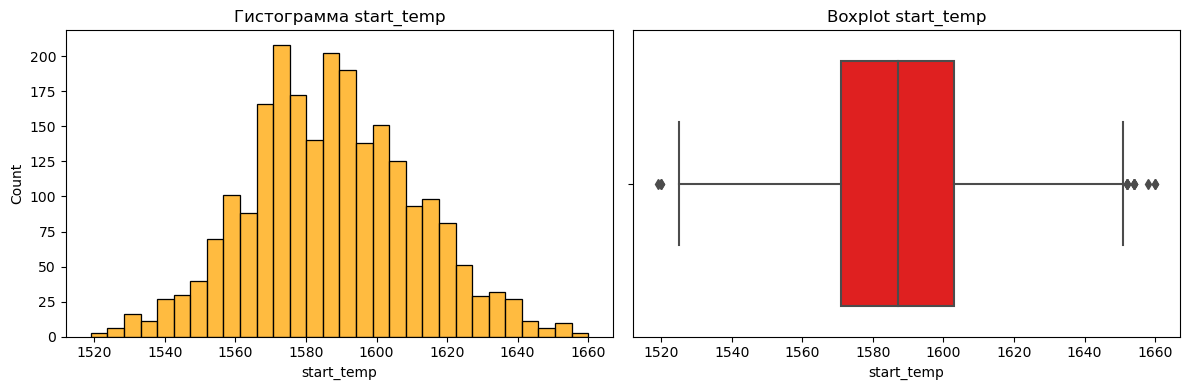

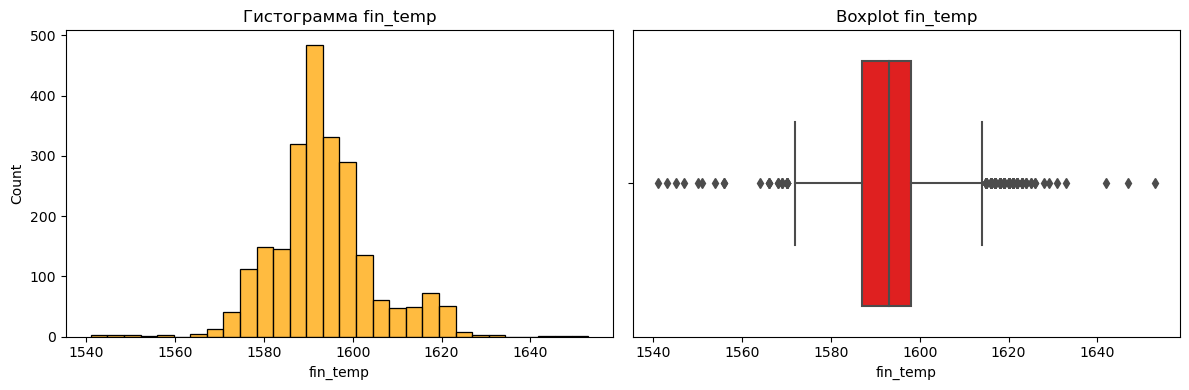

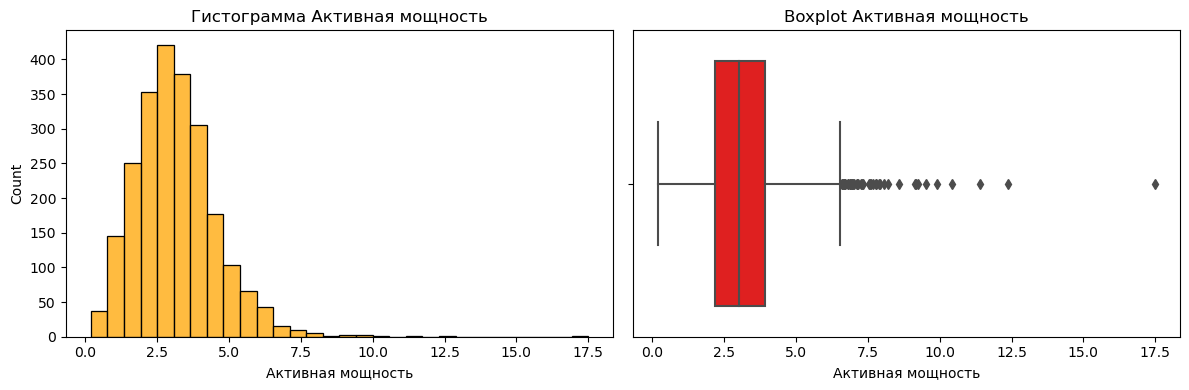

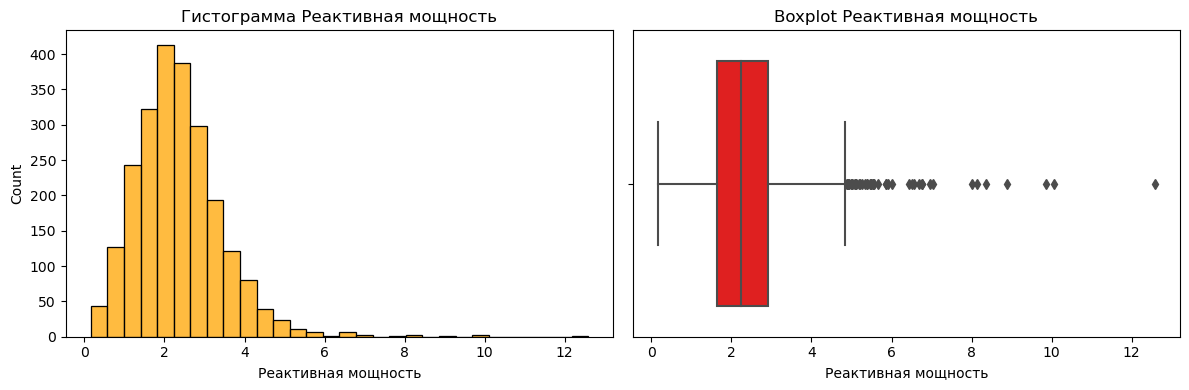

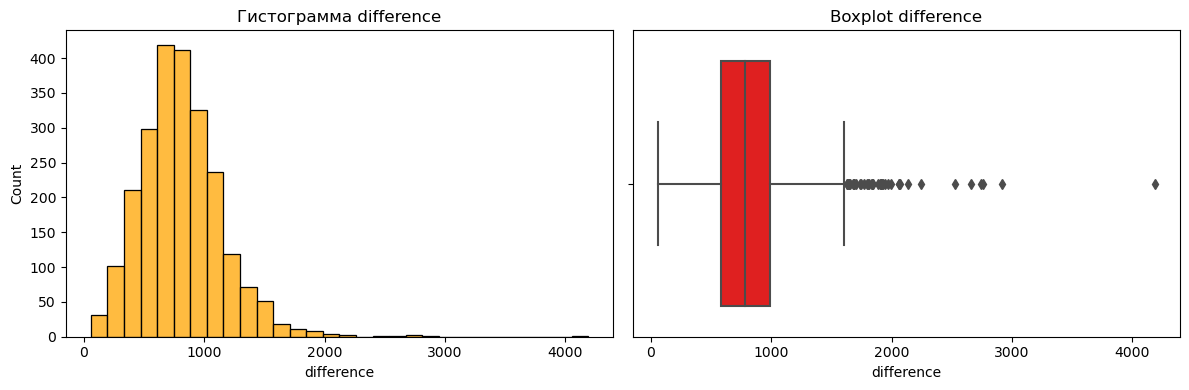

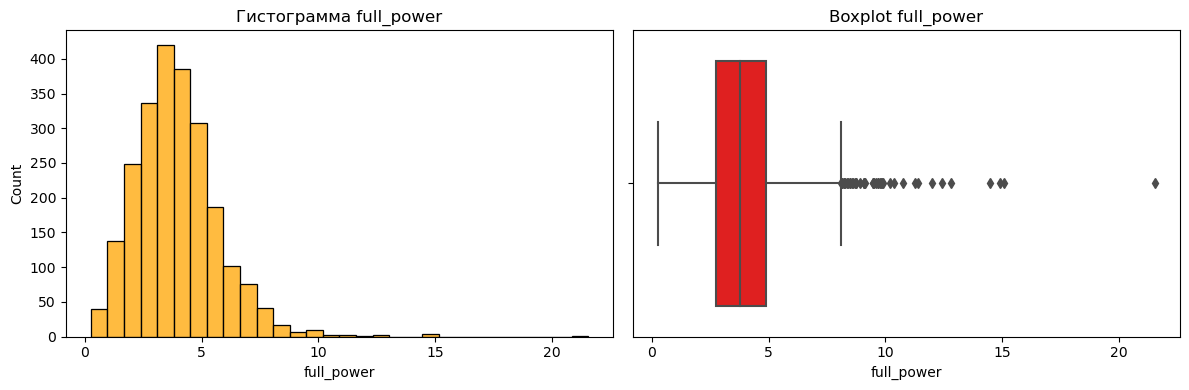

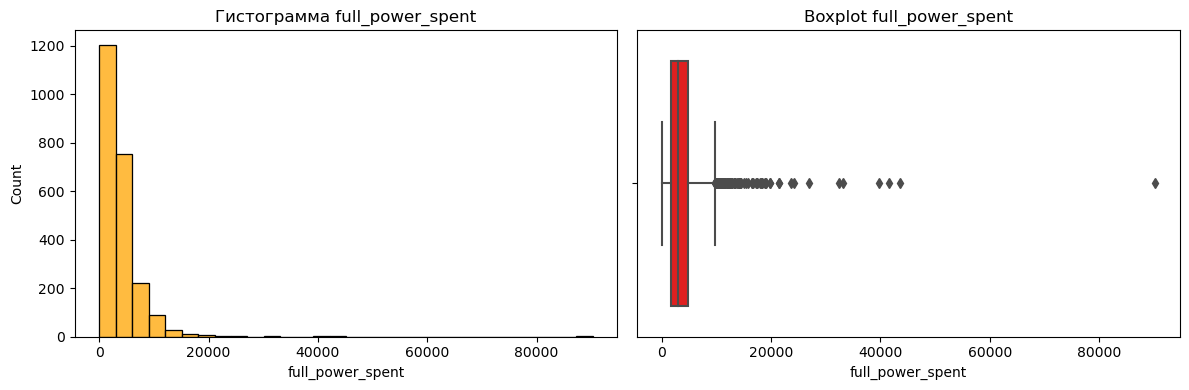

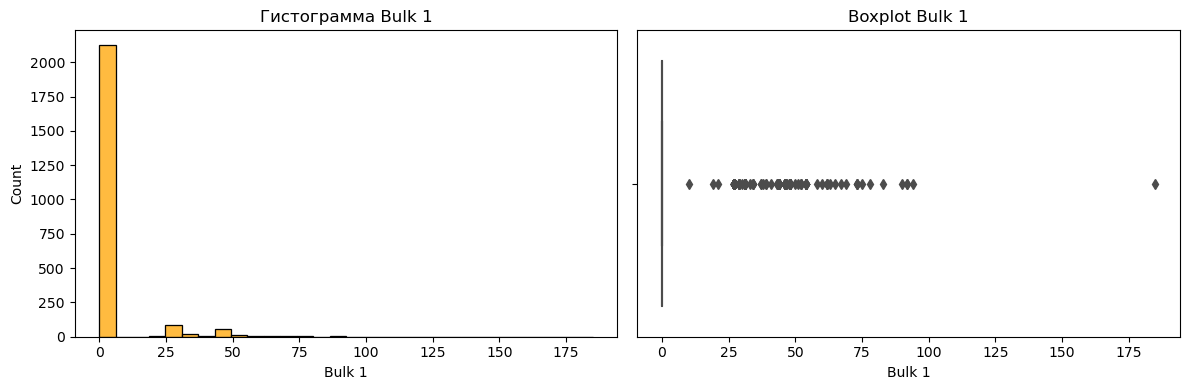

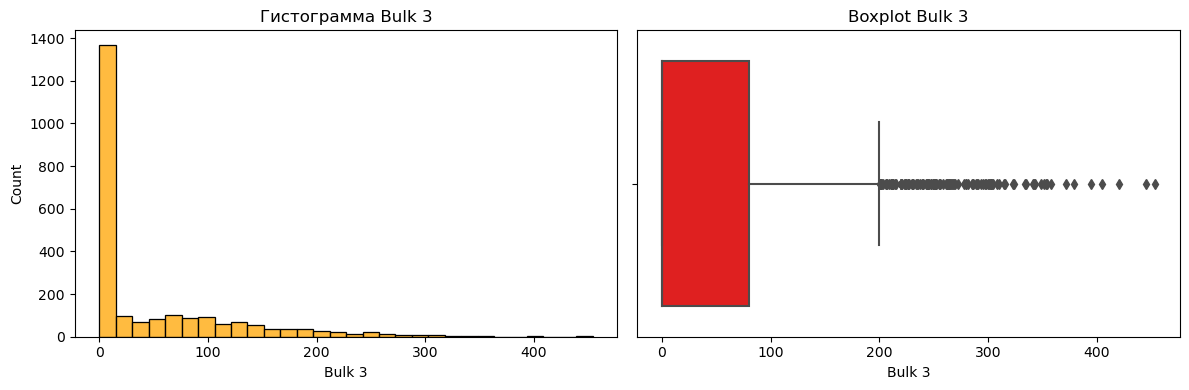

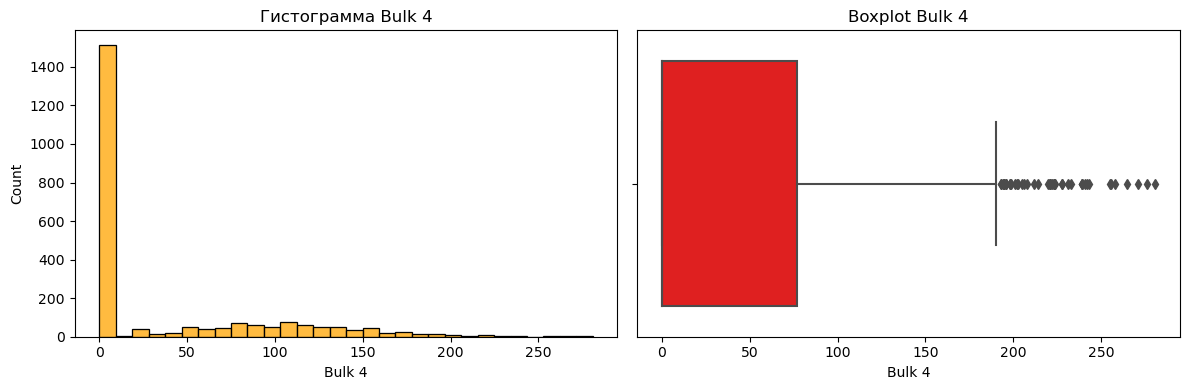

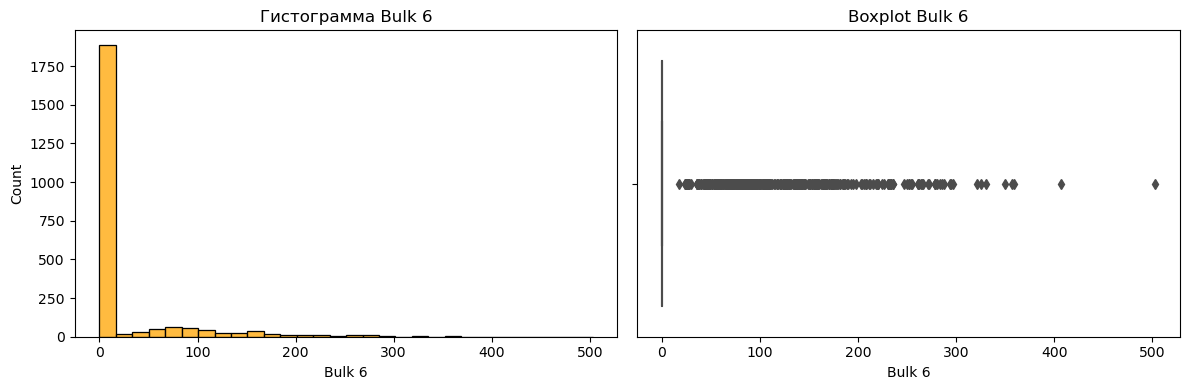

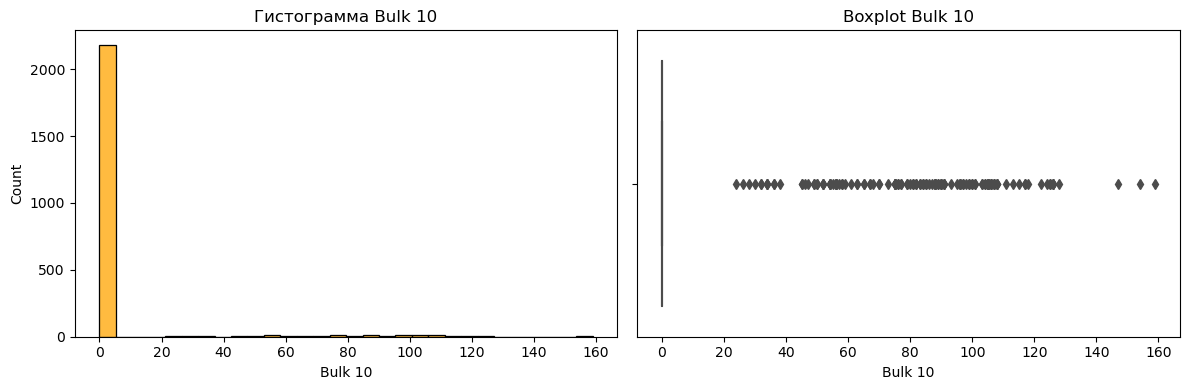

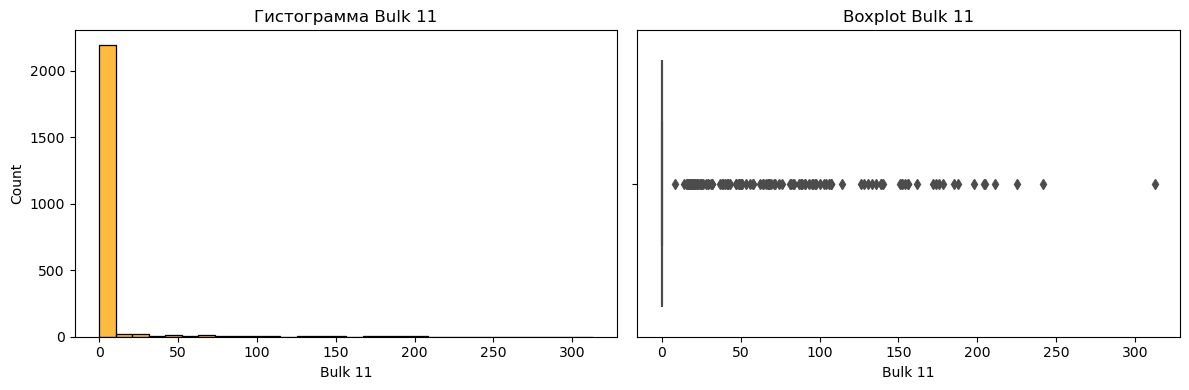

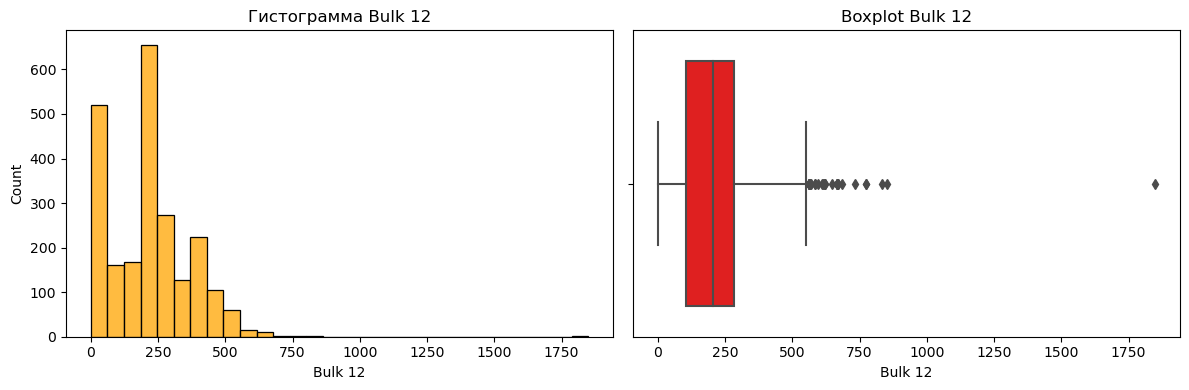

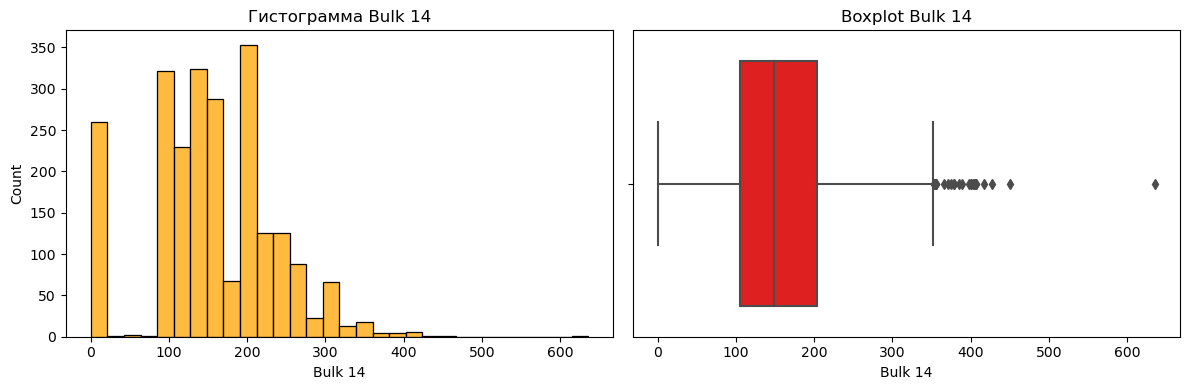

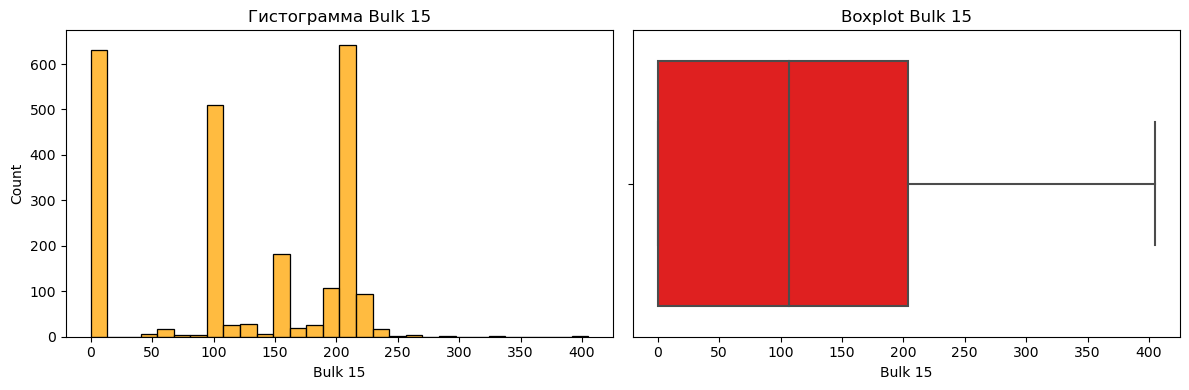

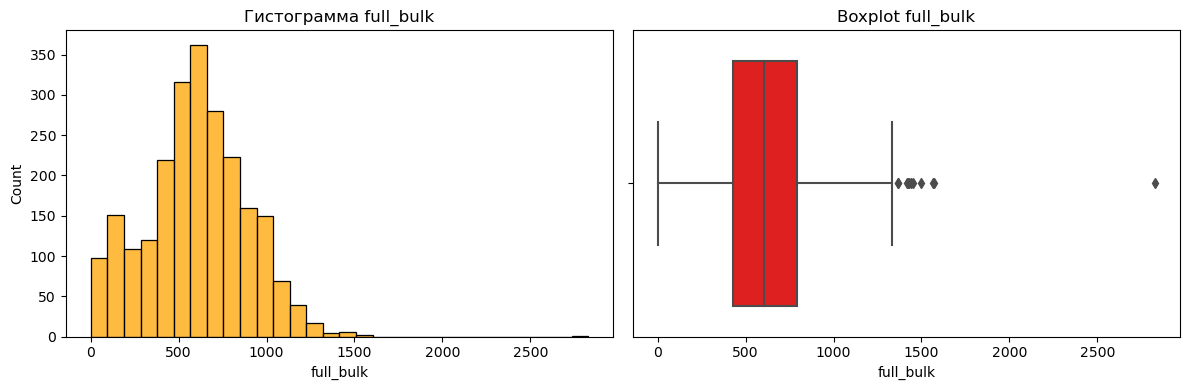

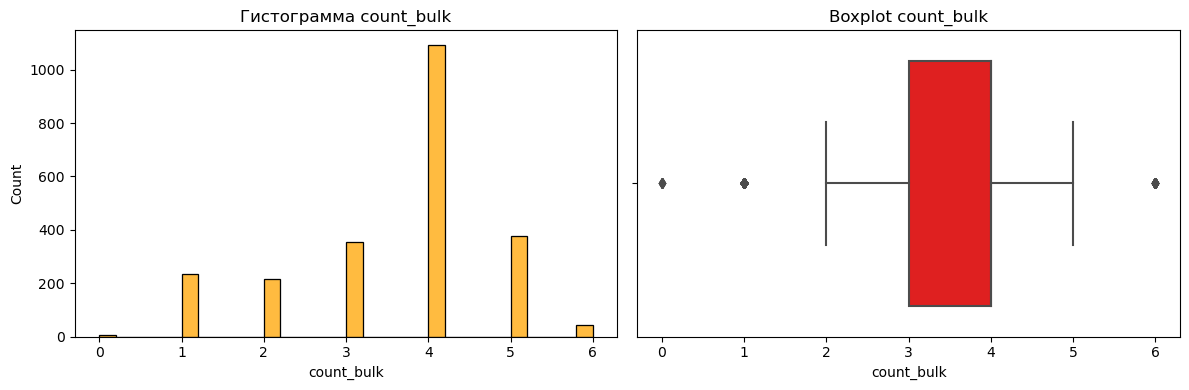

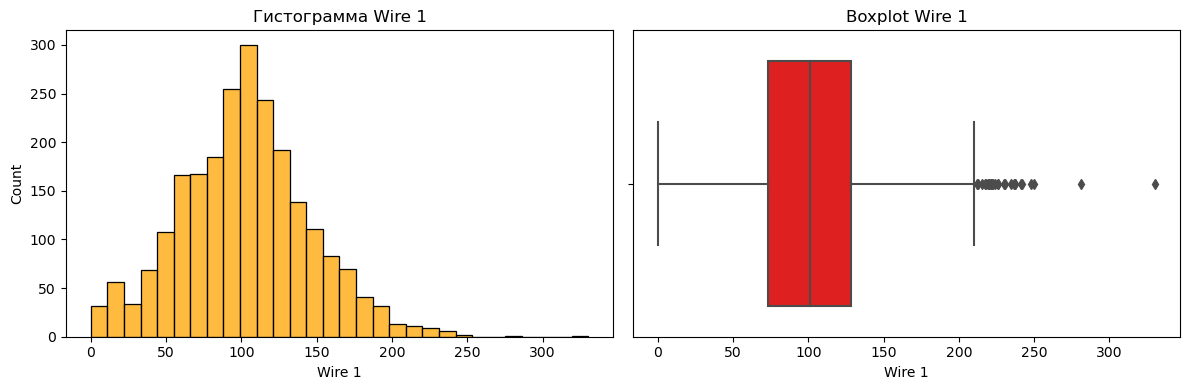

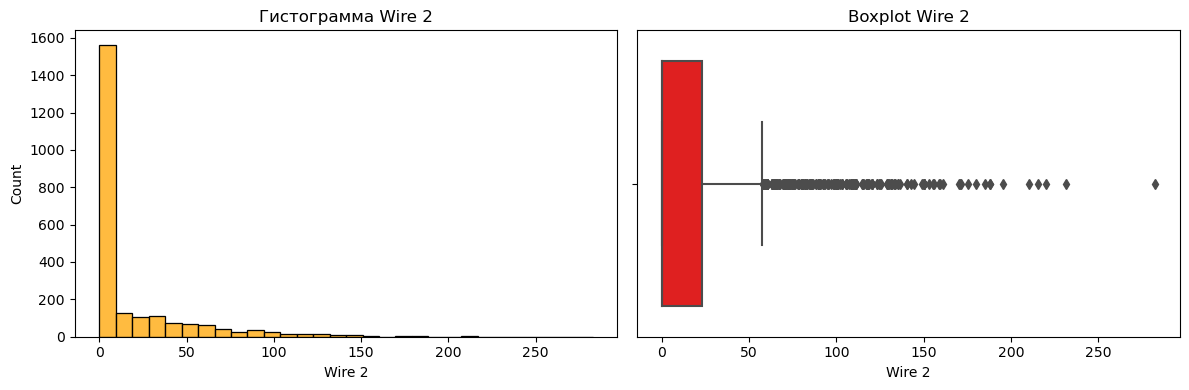

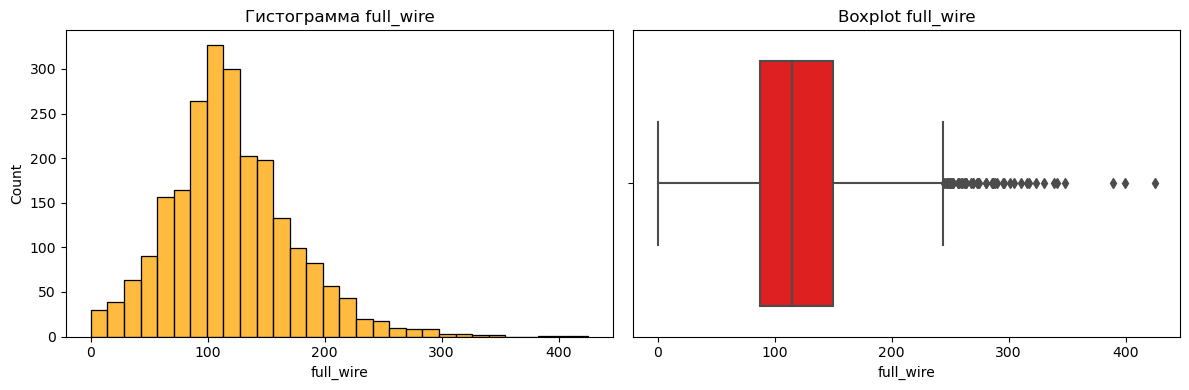

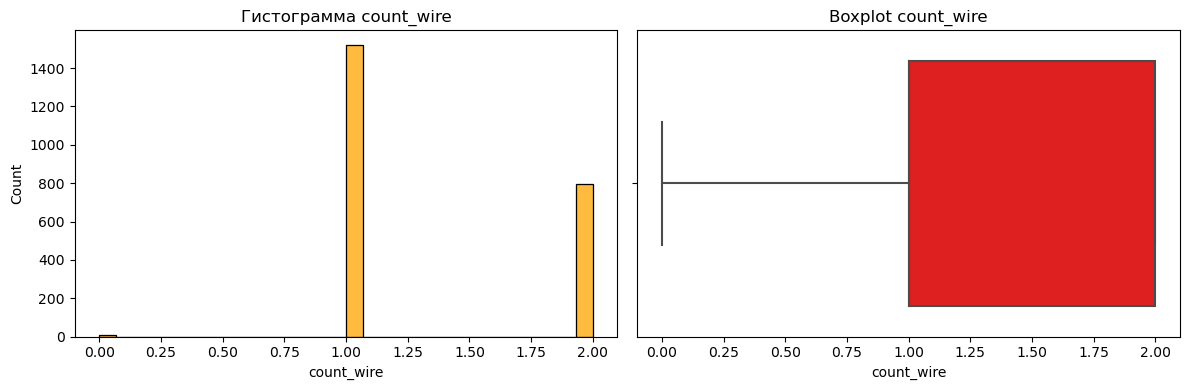

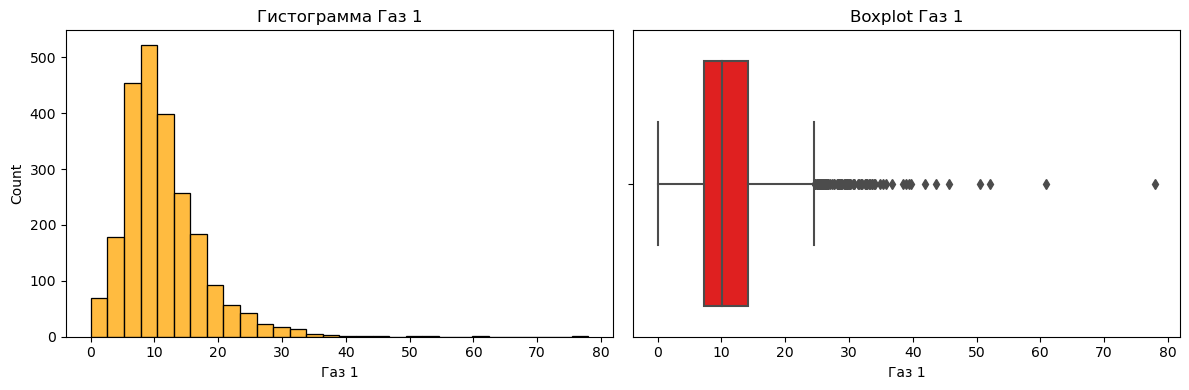

In [54]:
plot_features(data, ['start_temp', 'fin_temp', 'Активная мощность',
       'Реактивная мощность', 'difference', 'full_power', 'full_power_spent',
       'Bulk 1', 'Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 14', 'Bulk 15', 'full_bulk', 'count_bulk', 'Wire 1', 'Wire 2',
       'full_wire', 'count_wire', 'Газ 1'])

In [55]:

def plot_corr_heatmap(df, columns):
    corr = df[columns].corr()

    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap of Correlation')
    plt.show()


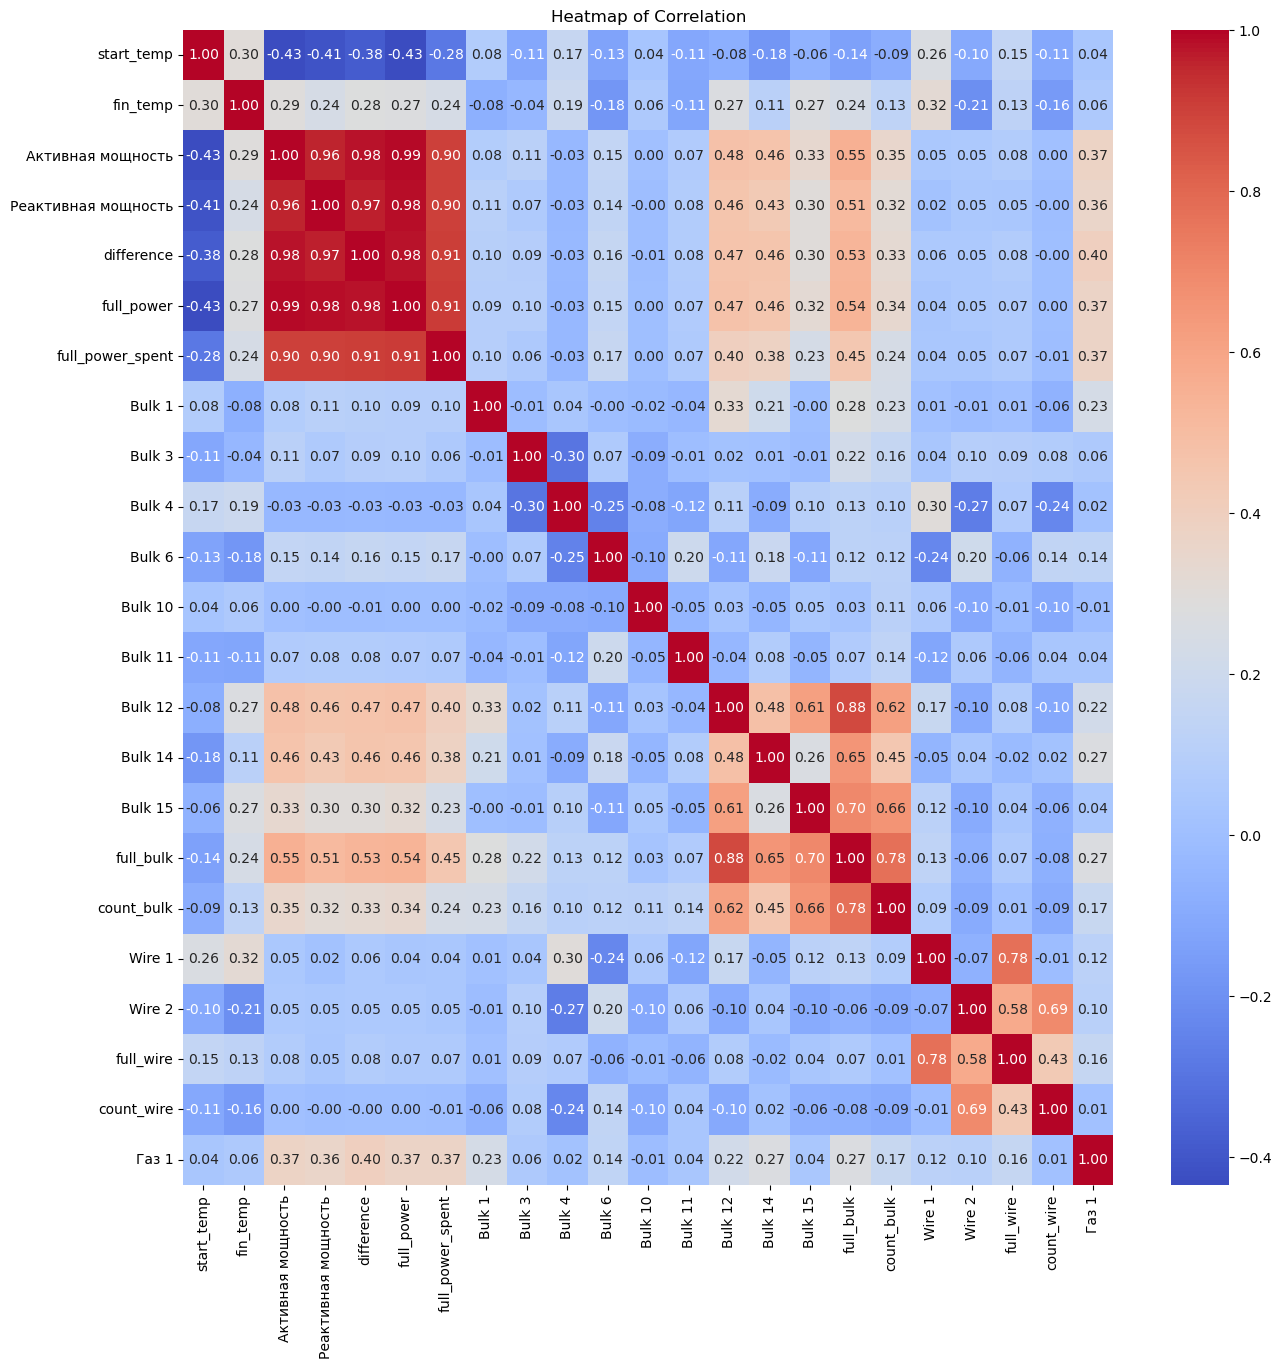

In [56]:
plot_corr_heatmap(data, ['start_temp', 'fin_temp', 'Активная мощность',
       'Реактивная мощность', 'difference', 'full_power', 'full_power_spent',
       'Bulk 1', 'Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 14', 'Bulk 15', 'full_bulk', 'count_bulk', 'Wire 1', 'Wire 2',
       'full_wire', 'count_wire', 'Газ 1'])





<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Мы провели объединение данных. Данные объединились по key с использованием метода merge по принципу inner, потому что таким образом мы избавились от ключей, которые не присутствовали в каком-либо наборе данных.</p>
<p>Ещё раз проверили набор данных на наличие пропусков, их не оказалось - все данные у нас в виде чисел. </p>
   <p> Также, смотря на распределение данных, можно сказать, что они имеют нормальное распределение, все данные находятся в пределах разумных значений и тех, которые установил заказчик. Конечно, если смотреть на бокс-плот некоторых признаков, то можно заметить выбросы, но это связано с тем, что в этих данных мало значений, отличных от нуля. </p>
       <p> Если смотреть на график корреляции, то видно,  что корреляция не такая сильная, но модели, основанные на градиентном бустинге, в состоянии улавливать и более сложные, нелинейные связи между признаками и целевой переменной, поэтому они могут быть эффективными даже при отсутствии сильной линейной корреляции, а именно эти модели я планирую использовать.
</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8);">
    <h3>Разделение на выборки</h3>
</div>

In [57]:
target = data['fin_temp']

In [58]:
df = data.drop(['key', 'fin_temp'], axis=1)

Так как в данных нет пропусков, то можно разделять наборы данных на тестовый и тренировочный 

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df, target, test_size=0.25, random_state=RANDOM_STATE) 


In [60]:
print(X_train.shape)
X_train.head()

(1743, 22)


,start_temp,Активная мощность,Реактивная мощность,difference,full_power,full_power_spent,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,full_bulk,count_bulk,Wire 1,Wire 2,full_wire,count_wire,Газ 1
189,1591.0,2.631394,2.190120,710.0,3.423574,2430.737603,0.0,0.0,140.0,0.0,0.0,0.0,123.0,129.0,203.0,595.0,4,177.035034,0.000000,177.035034,1,9.480324
460,1582.0,3.156333,2.201172,744.0,3.848064,2862.959762,0.0,0.0,0.0,0.0,0.0,0.0,206.0,221.0,104.0,531.0,3,0.000000,23.193039,23.193039,1,6.661032
1465,1570.0,3.121336,2.540226,831.0,4.024362,3344.244940,0.0,0.0,0.0,0.0,0.0,0.0,205.0,101.0,103.0,409.0,3,92.055596,45.119358,137.174954,2,10.933015
745,1582.0,5.298894,4.115700,1477.0,6.709490,9909.917210,0.0,0.0,134.0,0.0,0.0,0.0,206.0,154.0,153.0,647.0,4,163.987198,0.000000,163.987198,1,10.913291
500,1571.0,6.656120,6.763064,1734.0,9.489098,16454.095066,0.0,0.0,0.0,114.0,0.0,174.0,105.0,262.0,0.0,655.0,4,52.275597,0.000000,52.275597,1,6.660501


In [61]:
print(X_test.shape)
X_test.head()

(582, 22)


,start_temp,Активная мощность,Реактивная мощность,difference,full_power,full_power_spent,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,full_bulk,count_bulk,Wire 1,Wire 2,full_wire,count_wire,Газ 1
997,1579.0,3.139769,2.239747,725.0,3.856763,2796.153014,27.0,0.0,132.0,0.0,0.0,0.0,206.0,124.0,204.0,693.0,5,73.101601,0.000000,73.101601,1,6.678986
852,1572.0,2.980428,2.131489,689.0,3.664178,2524.618663,0.0,0.0,0.0,0.0,0.0,0.0,257.0,153.0,203.0,613.0,3,58.967995,0.000000,58.967995,1,11.793956
2129,1588.0,4.214657,2.935808,996.0,5.136370,5115.824829,0.0,127.0,0.0,0.0,0.0,0.0,261.0,193.0,105.0,686.0,4,81.201126,60.139042,141.340168,2,9.025628
2128,1577.0,5.911470,4.235606,1421.0,7.272265,10333.888639,0.0,151.0,0.0,0.0,0.0,0.0,416.0,201.0,208.0,976.0,4,99.240959,39.147678,138.388637,2,15.407541
463,1571.0,2.925360,2.246685,702.0,3.688540,2589.354842,0.0,0.0,159.0,0.0,0.0,0.0,285.0,129.0,225.0,798.0,4,100.151993,0.000000,100.151993,1,7.133954


In [62]:
print(Y_train.shape)
Y_train.head()

(1743,)


189     1589.0
460     1590.0
1465    1592.0
745     1605.0
500     1592.0
Name: fin_temp, dtype: float64

In [63]:
print(Y_test.shape)
Y_test.head()

(582,)


997     1601.0
852     1597.0
2129    1595.0
2128    1619.0
463     1591.0
Name: fin_temp, dtype: float64

Удалять выбросы не будет, потому что заказчик просил оставить набор данных не меньше 1700 строк, надо провести стандартизацию фичей, для лучшего обучения модели

In [64]:
scaler = StandardScaler()
scaler.fit(X_train) 

X_train_st = scaler.transform(X_train)


In [65]:
X_train_st

array([[ 0.15057294, -0.36985264, -0.15769107, ...,  1.09494646,
        -0.70922623, -0.29513234],
       [-0.22832306, -0.00299724, -0.14761775, ..., -1.80545535,
        -0.70922623, -0.73113276],
       [-0.73351773, -0.02745478,  0.16140292, ...,  0.34345954,
         1.36142925, -0.07047521],
       ...,
       [-0.14412395,  0.37953225,  0.09522148, ...,  1.34393907,
        -0.70922623, -0.12067554],
       [-0.27042262,  0.37524322,  0.22225857, ...,  0.02397907,
        -0.70922623,  0.01707791],
       [ 0.27687161, -0.185658  , -0.32822743, ..., -0.06072403,
        -0.70922623, -0.1743071 ]])


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>Также здесь мы провели разделение на выборки, в тестовую выборку у нас ушло 25% даннных - это указание заказчика. И все признаки подвергли стандартизации, потому что так модель будет лучше обучаться и не будет отдавать приоритет признаку, лишь потому что он имеет большое или маленькое число.</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8);">
    <h3>Значимость фичей</h3>
</div>

In [66]:
rf = RandomForestRegressor(n_estimators=150, random_state = RANDOM_STATE)
rf.fit(X_train_st, Y_train)

RandomForestRegressor(n_estimators=150, random_state=220523)

In [67]:
rf.feature_importances_

array([0.21722901, 0.13195417, 0.03000447, 0.03986998, 0.0340182 ,
       0.03798623, 0.01759623, 0.01514527, 0.01892353, 0.06535784,
       0.00447591, 0.00440545, 0.03687275, 0.03750572, 0.03377621,
       0.04381194, 0.01283168, 0.07674221, 0.03471852, 0.04763413,
       0.00291163, 0.05622892])

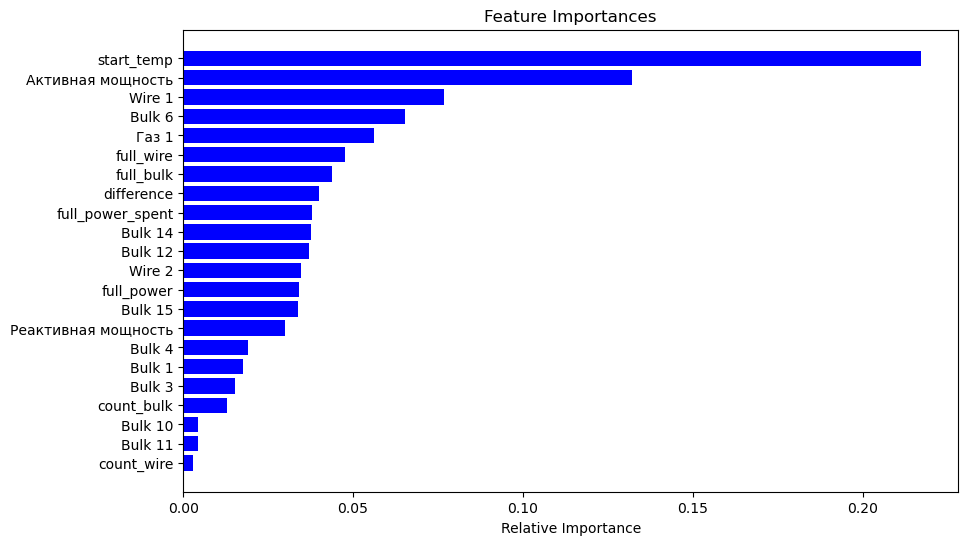

In [68]:
feature_importances = rf.feature_importances_
feature_names = df.columns  

# Сортируем значения по важности
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Как видно из диаграммы, признаки Bulk_10, Bulk_11, Count_wire имеют слишком маленький вес, поэтому их можно удалить для ускарения обучения

In [69]:
X_train = X_train.drop(['Bulk 10', 'Bulk 11', 'count_wire'], axis=1)

In [70]:
feature_names = X_train.columns

In [71]:
X_test = X_test.drop(['Bulk 10', 'Bulk 11', 'count_wire'], axis=1)

In [72]:
scaler.fit(X_train) 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>А здесь мы проверяли значимость признаков для обучения модели и выяснили, что признаки Bulk_10, Bulk_11, Count_wire имеют слишком маленькое значение для модели, поэтому стоит их удалить для ускорения обучения. Дальше удалили эти признаки и ещё раз провели стандартизацию обучающий и тестовый выборки. Можно приходить обучение модели и подбора гиперпараметров.</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8);">
    <h3>Подбор параметров для модели</h3>
</div>

In [84]:

def xgboost_grid_search(X_train, y_train):
    model = XGBRegressor(random_state = RANDOM_STATE)

    # Параметры для оптимизации
    parameters = {'n_estimators': [100, 200, 300],
                  'learning_rate': [0.01, 0.05, 0.1],
                  'max_depth': [3, 4, 5, 6],
                  'subsample': [0.6, 0.8, 1],
                  'colsample_bytree': [0.6, 0.8, 1],
                  'gamma': [0, 0.1, 0.2],
                  'reg_lambda': [0.5, 1, 1.5],
                  'reg_alpha': [0, 0.1, 0.2]}
    
    # Используем make_scorer чтобы задать метрику оценки MAE
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    
    grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3, scoring=mae_scorer, n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train, verbose=False)    

    # Выводим лучшие параметры
    print("Best parameters found: ", grid.best_params_)
    print("Lowest MAE found: ", -grid.best_score_)
    return grid.best_estimator_


In [85]:
X_batch = X_train[:600]
Y_batch = Y_train[:600]

In [86]:
best_xgb = xgboost_grid_search(X_batch, Y_batch)

Best parameters found:  {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.2, 'reg_lambda': 0.5, 'subsample': 0.8}
Lowest MAE found:  6.34295166015625


Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.2, 'reg_lambda': 0.5, 'subsample': 0.6}
Lowest MAE found:  6.141371866861978

In [103]:

def lightgbm_grid_search(X_train, y_train):
    model = LGBMRegressor(random_state=RANDOM_STATE)

    # Параметры для оптимизации
    parameters = {'num_leaves': [31, 62],
                  'learning_rate': [0.01, 0.05, 0.1],
                  'n_estimators': [100, 200],
                  'subsample': [0.6, 0.8, 1],
                  'colsample_bytree': [0.6, 0.8, 1],
                  'reg_lambda': [0.5, 1, 1.5],
                  'reg_alpha': [0, 0.1, 0.2],
                  'min_child_samples': [20, 30]}
    
    # Используем make_scorer чтобы задать метрику оценки MAE
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    
    # Установим verbosity в -1, чтобы отключить вывод предупреждений
    model.set_params(verbosity=-1)
    
    grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3, scoring=mae_scorer, n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)    

    # Выводим лучшие параметры
    print("Best parameters found: ", grid.best_params_)
    print("Lowest MAE found: ", -grid.best_score_)
    return grid.best_estimator_




In [104]:
best_lgb = lightgbm_grid_search(X_batch, Y_batch)

Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 0.2, 'reg_lambda': 1.5, 'subsample': 0.6}
Lowest MAE found:  6.520408701187077


Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.6}
Lowest MAE found:  6.278135131208399

In [105]:

def random_forest_grid_search(X_train, y_train):
    model = RandomForestRegressor(random_state = RANDOM_STATE)

    # Параметры для оптимизации
    parameters = {'n_estimators': [100, 200, 300],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'max_features': ['auto', 'sqrt']}
    
    # Используем make_scorer чтобы задать метрику оценки MAE
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    
    grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3, scoring=mae_scorer, n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)    

    # Выводим лучшие параметры
    print("Best parameters found: ", grid.best_params_)
    print("Lowest MAE found: ", -grid.best_score_)
    return grid.best_estimator_


In [106]:
best_forest = random_forest_grid_search(X_batch, Y_batch)

Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Lowest MAE found:  6.522499736043592


Best parameters found:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Lowest MAE found:  6.433942698578309

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h3>Итог подбора параметров:</h3>
<p>Мы рассмотрели три модели: xgboost, lgbm, randomForest. Подбор параметров для этих моделей проходил на небольшом количестве данных, пачками по 600 штук. Здесь мы использовали кросс-валидацию и сетку для подбора параметров, также мы минимизировали метрику средней ошибки. Все модели выдали хороший результат, который удовлетворяет требованиям заказчика, но модель xgboost показала лучшую метрику - 6,14. Именно её мы и будем проверять на тестовых данных. </p>
</div>



<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8); text-align: center;">
    <h2>4. Проверка на тестовой выборке</h2>
</div>





<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">

<p>Здесб мы берем модель xgboost, подставляем ей лучшие параметры полученые при подборе, обучаем на тренировочной выборке и проверяем на тесте.</p>
</div>

In [107]:
params = best_xgb.get_params()

model = XGBRegressor(**params)

In [108]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=220523, ...)

In [109]:
test_predict = model.predict(X_test)

In [110]:
print('Best MAE: ', mean_absolute_error(Y_test, test_predict))

Best MAE:  5.994393574822809


Best MAE:  5.994393574822809

In [111]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, Y_train)


dummy_predictions = dummy_regr.predict(X_test)


dummy_mae = mean_absolute_error(Y_test, dummy_predictions)

print(f"MAE for DummyRegressor: {dummy_mae}")

MAE for DummyRegressor: 8.18938591873631


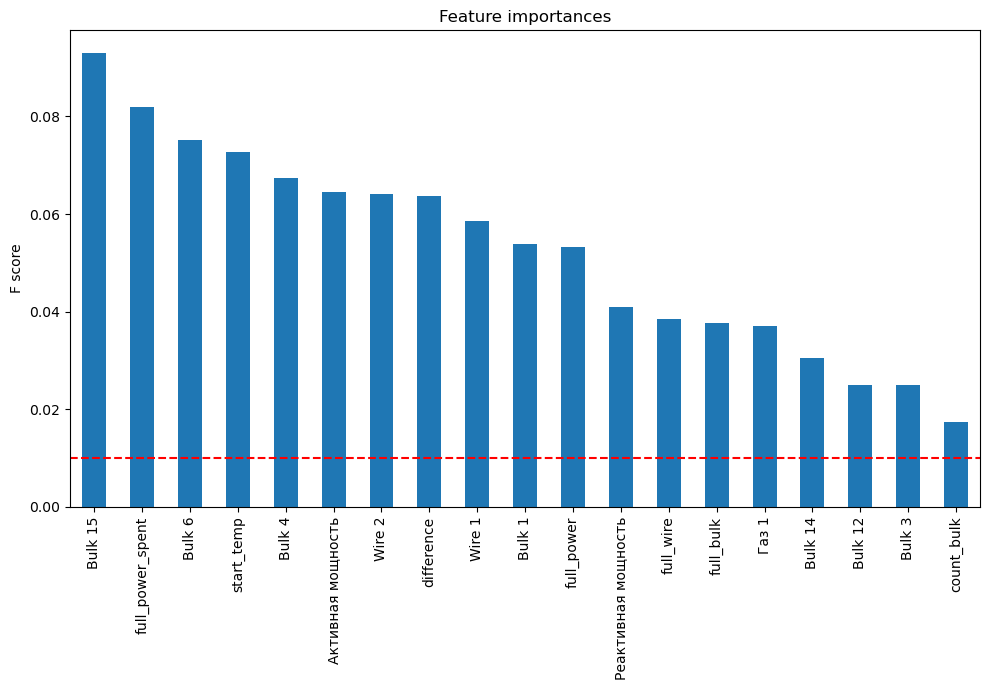

[LightGBM] [Warning] Unknown parameter: log_evaluation.<locals>._callback
[LightGBM] [Warning] Unknown parameter: callbacks
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x7fe7803b1ee0>
[LightGBM] [Warning] Unknown parameter: at


In [112]:
importances = model.feature_importances_
model_importances = pd.Series(importances, index=feature_names)
model_importances = model_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,7))
model_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("F score")
ax.axhline(y=0.01, color='r', linestyle='--') # Добавляем горизонтальную линию
fig.tight_layout()

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h3>Итог проверки:</h3>
    <p>Проверив лучшую модель на тестовых данных, мы получили прекрасный результат, который равен 5,99. Это значительно лучше, чем требуемое заказчиком значение. Если сравнивать нашу модель с константной, то последняя выдаёт метрику 8,18, что говорит о том, что наша модель более точно предсказывает температуру.  </p>
       <p> Заказчик также попросил вывести график значимости признаков. На нём хорошо видно, что на температуру сильно влияют объем потраченной энергии, стартовая температура и сыпучие материалы под номером 15 и номером 6. Конечно, остальные признаки тоже имеют большое значение: ни один из них не опускается по значимости ниже 0,01. </p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>Вывод</h2>
    <p>Подводя итог данной работы, хочется отметить сам процесс решения данной проблемы. 
        На первом этапе, после обзора данных, была проведена предобработка данных, в процессе которой было удалено большое количество пропущенных значений, а также значения, выходящие за пределы установленных рамок. Данные были подготовлены к объединению, так как многие из них имели несколько записей для одного ключа. Также в процессе предобработки было разработано множество новых показателей, которые в будущем проявили себя как достаточно значимые признаки для обучения модели. Были разработаны такие показатели, как общий объем потраченной энергии, общая мощность, количество сыпучих материалов, время, потраченное на нагрев, объем сыпучих материалов и так далее. </p>
        <p>После того как все данные были собраны в один датафрейм, мы исследовали распределение признаков, из него можно заключить, что данные корректны, удовлетворяют всем требованиям заказчика и обладают нормальным распределением. На следующем этапе мы выбрали наиболее значимые признаки для модели - это нужно было для ускорения работы модели. </p>
        <p>На этапе выбора модели мы рассмотрели три разные модели, каждая из которых проявила себя хорошо, то есть проходила порог по метрике средней ошибки. Лучше всего себя проявила модель xgboost, которая показала метрику 6,13 на тренировочном наборе данных. 
        <p>После этого модель была проверена на тестовых данных, где показала метрику 5,99. Данную модель сравнили с константной, чтобы проверить её на адекватность, и модель прошла эту проверку, так как константная модель показала метрику 8,99. </p>
        <p>Подводя итог, можно сказать, что цель работы была достигнута. Так как мы планировали обучить модель, которая на основе разных данных будет точно предсказывать температуру, мы можем сказать, что наша модель отвечает этим требованиям. Метрика средней ошибки составляет 5,99, это говорит о том, что наша модель ошибается на это количество градусов относительно средней температуры в 1600, что является совсем небольшой погрешностью. </p>
        <p>Хочется отметить, что если на производстве будут использовать нашу модель, у них точно получится снизить затраты на электроэнергию, поскольку, как мы выяснили в конце анализа, одним из важных признаков для модели является объем потраченной электроэнергии. </p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color:rgba(147, 112, 219, 0.8); text-align: center;">
    <h2>Отчет</h2>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>План работы:</h2>
    <ol>
        <li><b>Первичный обзор данных:</b> изучение основных характеристик датасета, определение типов данных и проверка на наличие пропусков или аномалий.</li>
        <li><b>Предобработка данных:</b> подготовка данных для дальнейшего анализа и моделирования.</li>
            <ul><li><b>Удаление пропусков:</b> очистка данных от пропущенных или неполных значений, которые могут негативно повлиять на качество модели.</li>
                <li><b>Выведение новых фичей:</b> создание новых переменных на основе существующих данных для улучшения прогностической способности модели.</li>
            </ul>
        <li><b>Подбор гиперпараметров и фичей для моделей:</b> определение оптимальных параметров и выбор наиболее значимых переменных для построения модели.</li>
        <li><b>Выбор лучшей модели:</b> оценка и сравнение различных моделей на основе метрики MAE для выбора наиболее эффективной.</li>
        <li><b>Проверка на тестовой выборке:</b> оценка итоговой модели на отложенных данных для проверки ее способности к обобщению.</li>
    </ol>
</div>
<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>Введение:</h2>
    <p>В рамках данной работы нам представлен набор данных, содержащий информацию о процессе обработки стали в компании ООО «Так закаляем сталь». Данные включают всю информацию о процессе обработки стали, начиная от этапа смешивания до финальных замеров. Заказчик стремится оптимизировать производственные расходы, а именно уменьшить потребление электроэнергии на этапе обработки стали.</p>
    <p>Снижение потребления электроэнергии станет возможным, если мы сможем точно предсказать температуру раствора. Так, если мы предсказываем, что температура стали поднимется выше оптимальной, мы можем заранее уменьшить использование электроэнергии, сэкономив таким образом на затратах. С другой стороны, если мы предсказываем, что температура упадет ниже необходимого уровня, мы можем заранее увеличить энергию для поддержания правильного нагрева, чтобы предотвратить дефекты продукции и избыточные затраты на переработку.</p>
    <p>В данной работе мы будем использовать метрику MAE, поскольку она легко интерпретируется: если MAE равна 1.0, это означает, что в среднем наши прогнозы отличаются от истинных значений на одну единицу температуры. Кроме того, в отличие от других метрик, MAE не увеличивает вес для больших ошибок, т.е. все ошибки, независимо от их размера, учитываются одинаково. Еще одним преимуществом MAE является ее устойчивость к выбросам по сравнению с MSE. В данных о температуре могут быть выбросы или аномалии, которые могут сильно искажать MSE, в то время как MAE будет менее чувствителен к этим аномалиям.</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>Цель:</h2>
    <p>Снизить потребление электроэнергии по средствам более четкого подбора параметров. Данная задача будет реализована через прагнозирование температуры на основе параметров. Прогнозирование температуру - это задача регрессии.</p>
</div>
<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">  
    <p>В данной работе я полностью придерживался плана, который был намечен до начала работы. </p>
        <p>Так, в первой главе, где был обозначен первичный обзор данных, были выведены два основных показателя: первые пять строк и информация о наборе данных. Из данного обзора, я сделал заключение о состоянии набора данных. А именно, было обнаружено, что данные разделены на семь наборов данных, и каждый из них имеет столбец ключ, который соответствует партии расплавленного металла:</p>

<p>1. data_arc содержит в себе информацию об электродах.</p>
<p>2. data_bulk — данная подача сыпучих материалов.</p>
<p>3. data_bulk_time — данные о времени подачи сыпучих материалов.</p>
<p>4. data_gas — данные продувке газом.</p>
<p>5. data_temp — результат изменения температуры.</p>
<p>6. data_wire — данные о подаче проволочных материалов.</p>
<p>7. data_wire_time — время подачи проволочных материалов.</p>
<p>Первый набор данных не содержал пропусков и имел несколько значений для одного ключа. Второй набор данных, содержащий много пропусков, требовал заполнения каждого пропуска нулем по указанию заказчика. Это говорит об отсутствии подачи материалов. В некоторых столбцах содержалось очень мало информации, что говорит нам о редкой подаче данного материала.</p>

<p>Третий набор данных был аналогичен второму, поскольку это два взаимосвязанных набора. Четвертый набор данных не имел пропусков. Пятый набор данных имел пропуски, а также для одного ключа содержал несколько значений. Шестой набор данных также содержал достаточно много пропусков, который тоже нужно заполнять нулем по указанию заказчика. Здесь также было выявлено несколько столбцов, которые содержат всего несколько значений, отличных от нуля. Седьмой набор данных, содержащий информацию о времени подачи проволочных материалов, имел аналогичную ситуацию с шестым.</p>
<p>
Из представленной информации я сделал вывод, что придется объединять значения в наборах данных, которые содержат несколько записей для одного ключа. Нужно будет заполнить пропуски нулями в тех наборах данных, где это указано заказчиком, а в остальных удалить пропуски.</p>
</div>


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
<p>На этапе предобработки данных я начал с обработки данных, содержащих наш целевой признак. Так как заказчик указал, что мы не можем использовать промежуточную температуру, был проведён отбор первого и последнего значения. Эти данные были помещены в новый набор, который называется new_temp. В него вошли три столбца: key (идентификатор партии), start_temp (начальная температура) и fin_temp (конечная температура).</p>

<p>Далее я проверил все данные на наличие пропусков. Оказалось, что было достаточно много пропусков в финальной температуре, которые пришлось удалить. Также были удалены все строки с температурой, которая была ниже 1500 градусов.</p>

<p>Дальше я обработал набор данных, содержащий информацию о подаче напряжения на нагревающий элемент. На первом этапе я удалил все строки с ключом, который не входил в обработанный набор данных с целевым признаком. Далее был проведён анализ распределения мощности в данном наборе. Оказалось, что присутствуют значения отрицательной мощности. Заказчик указал на их удаление.</p>

<p>Перешёл к разработке новых признаков. Был добавлен столбец difference, который содержит информацию о времени подачи напряжения на нагревающийся элемент. Далее данные были собраны в новый набор data_arc, в него вошли столбец key (информация о номере партии), active_power (информация о подаче активной мощности), reactive_power (информация о подаче реактивной мощности) и difference (время подачи). Все данные в новом наборе суммировались по ключу. Это было сделано для того, чтобы уйти от нескольких записей для одной партии.</p>

<p>Затем был сформирован новый признак full_power. Он содержит информацию о полном объеме мощности, поданной на элемент. Расчёты проводились по формуле Пифагора. Также был создан столбец full_power_spent, который содержит информацию о затраченном объеме электроэнергии.</p>

<p>Дальше был обработан набор данных о сыпучих материалах. Все пропуски были заполнены нулями по указанию заказчика. Также были удалены столбцы, в которых значения, отличные от нуля, встречались меньше 100 раз. Это было сделано, потому что столбцы с такими значениями могут негативно повлиять на обучение модели, так как модель может не придавать им значение при обучении.</p>

<p>Под удаление попали следующие столбцы: Bulk_2, Bulk_5, Bulk_7, Bulk_8, Bulk_9, Bulk_13. После был создан новый набор data_bulk_new, содержащий всю информацию о сыпучих материалах, кроме удалённых. Были добавлены два новых признака: full_bulk, который содержит информацию об объеме поданных материалов, и count_bulk, который содержит информацию о количестве поданных материалов.</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <p>
Дальше подобным образом была обработана информация о проволочных материалах. Все пропуски были заполнены нулями, а столбцы с количеством значений, отличных от нуля и меньше 100, были удалены. Все эти данные были собраны в новый набор data_wire_new, в который вошли следующие столбцы: key (содержит ключ с номером партии), Wire_1 (информация о подаче первого материала), Wire_2 (информация о подаче второго материала). Также были созданы два новых столбца: full_wire (содержит информацию о полном объеме поданных материалов) и count_wire (содержит информацию о количестве поданных материалов).</p>

 <p>Далее был обработан набор данных, содержащий информацию о продукте газа. Пропусков в этом наборе не было обнаружено, но было выявлено, что четыре ключа не представлены в этом наборе. Было принято решение не проводить никаких работ с этим набором данных, потому что планировалось объединять все наборы методом 'inner', который исключает строки, не находящиеся хотя бы в одном наборе.</p>

 <p>Итогом предобработки можно сказать, что все требования заказчика были соблюдены, также были сгенерированы новые признаки, а пропуски и некорректные значения были удалены.</p>

 <p>Следующим этапом в моей работе стало определение важности признаков и подбор гиперпараметров модели. Этот этап я начал с того, что объединил все датафреймы, используя для этого метод 'merge' с параметром 'inner'. Такой подход позволил избавиться от строк, ключи которых не входили хотя бы в один из наборов данных. Данный набор содержит следующие столбцы 'start_temp', 'fin_temp', 'Активная мощность',
       'Реактивная мощность', 'difference', 'full_power', 'full_power_spent',
       'Bulk 1', 'Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 14', 'Bulk 15', 'full_bulk', 'count_bulk', 'Wire 1', 'Wire 2',
       'full_wire', 'count_wire', 'Газ 1'.</p>

<p>Также был проведён финальный обзор данных. Была проверена наличие пропусков, которые отсутствовали, а также тип столбцов, ведь все они должны быть числами или дробными числами. Каждый столбец отвечал этим требованиям.</p>

<p>По каждому столбцу были выведены диаграммы распределения, на которых видно, что данные распределяются нормально. Не было обнаружено критических значений, которые нужно было бы удалить по требованию заказчика. Однако можно было заметить, что некоторые данные содержат выбросы. Это нормально, потому что в этих столбцах большая часть значений составляет ноль.</p>

<p>Была выведена матрица корреляции, на которой видно, что все признаки коррелируют с целевым признаком в диапазоне от 0.06 до 0.3. Это говорит о наличии некоторой зависимости в данных, но такая ситуация не отразится негативно на обучении модели, потому что все модели нелинейны, и корреляция признаков не оказывает большого влияния на их обучение.</p>

<p>Далее данные были разделены на выборки. Размер тестовой выборки составляет 25% от общего объема данных, таковы требования заказчика. Данные были выделены в набор с целевым признаком target и набор с признаками, из которых был исключён целевой признак и ключ. Длина тренировочной выборки составляет 1743 строки, тестовой — 582 строки.</p>

<p>Для корректного обучения модели данные были стандартизированы с помощью метода StandardScaler. Это было необходимо для того, чтобы модель не придавала большего значения признакам, значение которых кратно отличается от других.</p>

<p>Также, по требованию заказчика, нужно было провести анализ значимости признаков. Для этого была обучена модель случайного леса, после чего был построен график значимости. Признаки Bulk_10, Bulk_11, count_wire были удалены, потому что их значимость составляла менее 1%, а их наличие увеличивало время обучения модели.</p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
<p>Мы рассмотрели три модели: xgboost, lgbm, randomForest.</p>

<p>Были выбраны именно эти три модели по следующим причинам. Во-первых, эти модели могут хорошо работать с нелинейными зависимостями между признаками, что мы увидели, когда делали обзор признаков, потому что температура сплава зависит от множества разных параметров. Во-вторых, эти модели хорошо масштабируются и имеют большую скорость работы, что важно для заказчика. Также эти модели имеют регуляризацию для предотвращения переобучения на небольшом объеме данных. В нашем случае 1700 строк - это очень важно. Наконец, эти модели ранжируют признаки по важности, что может дать более корректную информацию для предсказания температуры.
</p>
<p>Подбор параметров для этих моделей проходил на небольшом количестве данных, пачками по 600 штук. Это было сделано для ускорения процесса подбора гиперпараметров, потому что, особенно на платформе Яндекс.Практикум, не хватает вычислительных мощностей, и подбор параметров на полной выборке занял бы очень большое количество времени.</p>

<p>Здесь мы использовали кросс-валидацию и сетку для подбора параметров, также мы минимизировали метрику средней ошибки. Этот выбор обусловлен требованиями заказчика. Все модели выдали хороший результат, который удовлетворяет требованиям заказчика, но модель xgboost показала лучшую метрику - 6,14. Именно её мы и будем проверять на тестовых данных.</p>

<p>Лучшей моделью при подборе параметров оказалась XGBRegressor. Итогом работы стали следующие параметры: 'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.2, 'reg_lambda': 0.5, 'subsample': 0.6. Наименьшая MAE составила 6.141371866861978.</p>

<p>Значение каждого параметра и причины, по которым был выбран приведённый набор, обсудим ниже.</p>

<p>colsample_bytree: Этот параметр определяет долю столбцов (признаков), которые будут случайным образом выбраны при построении каждого дерева. Настройка этого параметра может помочь предотвратить переобучение и улучшить производительность модели.</p>
<p>gamma: Параметр gamma определяет минимальное снижение потерь, необходимое для выполнения дополнительного разделения в дереве. Увеличение этого параметра делает модель более консервативной и может помочь предотвратить переобучение.</p>

<p>learning_rate: Этот параметр определяет скорость, с которой модель адаптируется к новым данных. Слишком высокая скорость обучения может привести к переобучению.</p>
<p>max_depth: Этот параметр определяет максимальную глубину каждого дерева в ансамбле. Он настроен для предотвращения переобучения.</p>

<p>n_estimators: Этот параметр определяет количество деревьев в ансамбле. Больше деревьев обычно означает более сложную модель, которая может лучше соответствовать данным.</p>
<p>reg_alpha и reg_lambda: Это параметры регуляризации, которые можно настроить для предотвращения переобучения. Они вводят штрафы за сложность модели и помогают управлять балансом между смещением и дисперсией.</p>

<p>subsample: Этот параметр определяет долю наблюдений (строк), которые будут случайно выбраны при построении каждого дерева. Это еще один способ предотвратить переобучение.</p>

<p>rarandom_state — Он позволяет устанавливать "случайное" состояние генератора случайных чисел, который используется внутри алгоритмов для инициализации.</p>
</div>


<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
    <h2>Вывод</h2>
    <p>Подводя итог данной работы, хочется отметить сам процесс решения данной проблемы. 
        На первом этапе, после обзора данных, была проведена предобработка данных, в процессе которой было удалено большое количество пропущенных значений, а также значения, выходящие за пределы установленных рамок. Данные были подготовлены к объединению, так как многие из них имели несколько записей для одного ключа. Также в процессе предобработки было разработано множество новых показателей, которые в будущем проявили себя как достаточно значимые признаки для обучения модели. Были разработаны такие показатели, как общий объем потраченной энергии, общая мощность, количество сыпучих материалов, время, потраченное на нагрев, объем сыпучих материалов и так далее. </p>
        <p>После того как все данные были собраны в один датафрейм, мы исследовали распределение признаков, из него можно заключить, что данные корректны, удовлетворяют всем требованиям заказчика и обладают нормальным распределением. На следующем этапе мы выбрали наиболее значимые признаки для модели - это нужно было для ускорения работы модели. </p>
        <p>На этапе выбора модели мы рассмотрели три разные модели, каждая из которых проявила себя хорошо, то есть проходила порог по метрике средней ошибки. Лучше всего себя проявила модель xgboost, которая показала метрику 6,13 на тренировочном наборе данных. 
        <p>После этого модель была проверена на тестовых данных, где показала метрику 5,99. Данную модель сравнили с константной, чтобы проверить её на адекватность, и модель прошла эту проверку, так как константная модель показала метрику 8,99. </p>
        <p>Подводя итог, можно сказать, что цель работы была достигнута. Так как мы планировали обучить модель, которая на основе разных данных будет точно предсказывать температуру, мы можем сказать, что наша модель отвечает этим требованиям. Метрика средней ошибки составляет 5,99, это говорит о том, что наша модель ошибается на это количество градусов относительно средней температуры в 1600, что является совсем небольшой погрешностью. </p>
        <p>Хочется отметить, что если на производстве будут использовать нашу модель, у них точно получится снизить затраты на электроэнергию, поскольку, как мы выяснили в конце анализа, одним из важных признаков для модели является объем потраченной электроэнергии. </p>
</div>

<div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
<h2>Трудности:</h2>
<ul>
<li>данные содержатся в разных наборах</li>
<li>большое количество пропусков в данных</li>
<li>несколько значений для одного ключа</li>
<li>столбцы с малым количеством отличных от нуля значений</li>
<li>наличие отрицательной мощности</li>
<li>наличие температуры ниже 1500 градусов</li>
<li>мало значимые признаки в обучении модели</li>
<li>долгое обучение модели</li>
<li>нелинейность зависимости</li>
<li>малый объем данных</li>
</ul>

<h2>Решения:</h2>
<ul>
<li>так как для обучения данные нужно объединить в один набор, был использован метод merg с параметром "inner", таким образом мы исключили попадание данных, информации о которых нет хотя бы в одном из дата фреймов</li>
<li>пропуски в данных о сыпучих и проволочных материалах были заполнены нулями по указанию заказчика, пропуски в других наборах данных были удалены</li>
<li>в наборе данных с температурой, где содержалось несколько значений для одного ключа, были удалены все промежуточные замеры, оставил только первую и последнюю температуру по указанию заказчика, а в данных о подаче напряжения все значения были суммированы</li>
<li>столбцы с малым количеством показателей были удалены</li>
<li>отрицательная мощность была удалена по указанию заказчика</li>
<li>температуры ниже 1500 градусов были удалены по указанию заказчика</li>
<li>были разработаны новые признаки</li>
<li>для повышения скорости подбора параметров были использованы только значимые признаки, и подбор проводился на пачках с 600 строками</li>
<li>нелинейность решалась использованием сложных моделей xgboost, lgbm, randomForest</li>
<li>малый объем данных смогли обойти сложные модели xgboost, lgbm, randomForest</li>
</ul>
</div>

<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <title>Text in HTML</title>
</head>
    <div style="font-family: Arial; padding: 10px; border: 1px solid #ffffff; margin: 10px; border-radius: 15px; background-color: rgba(147, 112, 219, 0.8);">
<body>
  <h1>Ключевые моменты:</h1>
  <p>Предобработка данных и целевой признак: Первый и последнее значение температуры были выбраны для создания нового набора данных, new_temp.</p>
  
  <p>Обработка пропусков: Пропуски в данных о финальной температуре и строки с температурой ниже 1500 градусов были удалены.</p>
  
  <p>Обработка данных о подаче напряжения на нагревающий элемент: Удалены все строки с ключом, не присутствующим в обработанных данных с целевым признаком, а также отрицательные значения мощности.</p>
  
  <p>Разработка новых признаков: Созданы признаки, отражающие время подачи напряжения на нагревающий элемент и полный объем поданной мощности, а также затраченный объем электроэнергии.</p>
  
  <p>Обработка данных о сыпучих материалах: Пропуски заполнены нулями, столбцы с редко встречающимися значениями удалены. Введены два новых признака: полный объем и количество поданных материалов.</p>
  
  <p>Обработка данных о проволочных материалах: Пропуски заполнены нулями, столбцы с редко встречающимися значениями удалены. Введены два новых признака: полный объем и количество поданных материалов.</p>
  
  <p>Обработка данных о продукте газа: В данных не обнаружено пропусков, но было отмечено отсутствие четырех ключей. Не проводились изменения в этом наборе данных, так как все наборы данных планируется объединять методом 'inner'.</p>
  
  <p>Заключение по предобработке данных: Соблюдены все требования заказчика, сгенерированы новые признаки, устранены пропуски и исправлены некорректные значения.</p>
  
  <p>Объединение наборов данных и определение важности признаков: Все датафреймы объединены методом 'merge' с параметром 'inner', исключив строки с отсутствующими ключами.</p>
  
  <p>Анализ корреляции: Все признаки коррелируют с целевым признаком в диапазоне от 0.06 до 0.3, указывая на наличие некоторой зависимости в данных. Это не представляет проблемы для обучения модели, поскольку все модели нелинейны, и корреляция признаков не оказывает большого влияния на их обучение.</p>

  <h2>Обучение модели:</h2>
  <p>Выбор моделей для обучения: Выбраны модели, способные работать с нелинейными зависимостями и обеспечивающие хорошую масштабируемость и скорость работы. Эти модели также предусматривают регуляризацию для предотвращения переобучения на небольшом объеме данных.</p>

  <p>Подбор параметров для моделей: Подбор параметров производился на небольших наборах данных по 600 штук для ускорения процесса.</p>

  <p>Оценка качества моделей: Использовались кросс-валидация и сетка для подбора параметров, минимизировалась метрика средней ошибки. Модель xgboost показала наилучший результат - 6,14.</p>

  <p>Выбор лучшей модели: Лучшей моделью при подборе параметров оказалась XGBRegressor со следующими параметрами: 'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.2, 'reg_lambda': 0.5, 'subsample': 0.6. Минимальная MAE составила 6.141371866861978.</p>

  <p>Тестирование модели: Модель была протестирована на тестовых данных, где показала метрику 5,99.</p>

  <p>Проверка адекватности модели: Модель сравнивали с константной моделью. Константная модель показала метрику 8,99, что подтвердило адекватность обученной модели.</p>

  <h2>Итоговая оценка работы:</h2>
  <p>Цель работы была достигнута - обучена модель, способная точно предсказывать температуру на основе различных данных. Средняя ошибка модели составляет 5,99, что означает небольшое отклонение относительно средней температуры в 1600 градусов.</p>
</body>
</html>
